2.1 Install and import packages along with importing data into pandas Dataframe.

In [226]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [227]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

Import the CSV file into pandas Dataframe

In [228]:
df = pd.read_csv("data/stud.csv")

Show top 5 records from the pandas Dataframe

In [229]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the Dataframe

In [230]:
df.shape

(1000, 8)

2.2 Dataset Information

        Gender --> Male/Female
        Race/Ethnicity --> Group A, B, C, D, E
        Parental Education Leve --> Parent's Latest Education 
        Lunch --> Having lunch before test
        Test Preparation Course --> Complete or not before test
        Math Score
        Reading Score
        Writing Score

**3. Data Checks**

        3.1 Missing Value Check
        3.2 Duplicate Check
        3.3 Data Type Check
        3.4 Unique Values Check in each column
        3.5 Statistics of Dataset
        3.6 Categorical Check

**3.1 Missing Value Check**

In [231]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

None of the columns have missing values

**3.2 Duplicate Check**

In [232]:
df.duplicated().sum()

0

None of the rows are duplicated in the dataset.

**3.3 Data Type Check**

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**3.4 Unique Values Check in each column**

In [234]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

**3.5 Statistics of Dataset**

In [235]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**3.6 Categorical Check**

In [238]:
print("Categories in gender variable:     ",end=" " )
print(df["gender"].unique())

print("Categories in race_ethnicity variable:  ",end=" ")
print(df["race_ethnicity"].unique())

print("Categories in parental level of education  variable:",end=" " )
print(df["parental_level_of_education"].unique())

print("Categories in lunch variable:     ",end=" " )
print(df["lunch"].unique())

print("Categories in test preparation course variable:     ",end=" " )
print(df["test_preparation_course"].unique())

Categories in gender variable:      ['female' 'male']
Categories in race_ethnicity variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education  variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:      ['standard' 'free/reduced']
Categories in test preparation course variable:      ['none' 'completed']


In [239]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


**3.7 Average and Total Values**

In [240]:
df["total_score"] = df.math_score + df.reading_score + df.writing_score
df["avg_score"]   = df.total_score / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [241]:
reading_full = df[df['reading_score'] == 100]['avg_score'].count()
writing_full = df[df['writing_score'] == 100]['avg_score'].count()
math_full = df[df['math_score'] == 100]['avg_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [242]:
reading_less_35 = df[df['reading_score'] <= 35]['avg_score'].count()
writing_less_35 = df[df['writing_score'] <= 35]['avg_score'].count()
math_less_35 = df[df['math_score'] <= 35]['avg_score'].count()

print(f'Number of students with less than 35 marks in Maths: {math_less_35}')
print(f'Number of students with less than 35 marks in Writing: {writing_less_35}')
print(f'Number of students with less than 35 marks in Reading: {reading_less_35}')

Number of students with less than 35 marks in Maths: 27
Number of students with less than 35 marks in Writing: 18
Number of students with less than 35 marks in Reading: 15


Insights: The above snapshots show the number of students that flunked in Maths, Writing and Reading.

**4. Data Visualization:**

**4.1 Visualize Score Distribution**
Histogram and KDE(Kernel Density Estimation Function).

In [244]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


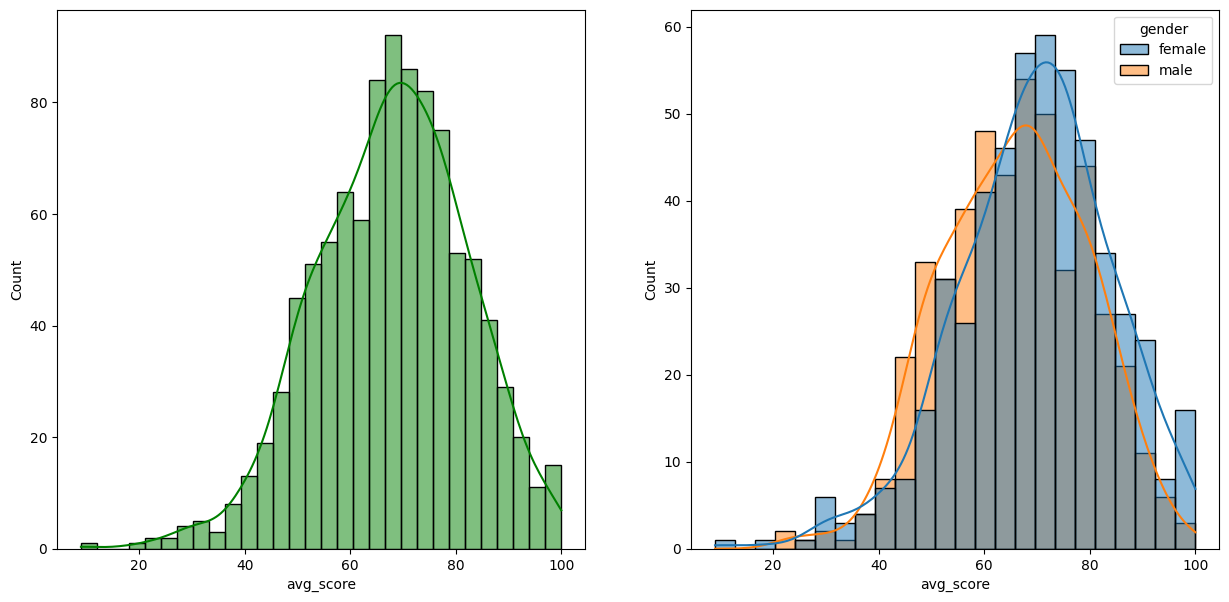

In [245]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data = df, x='avg_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data = df, x='avg_score', kde=True, hue='gender')
plt.show()

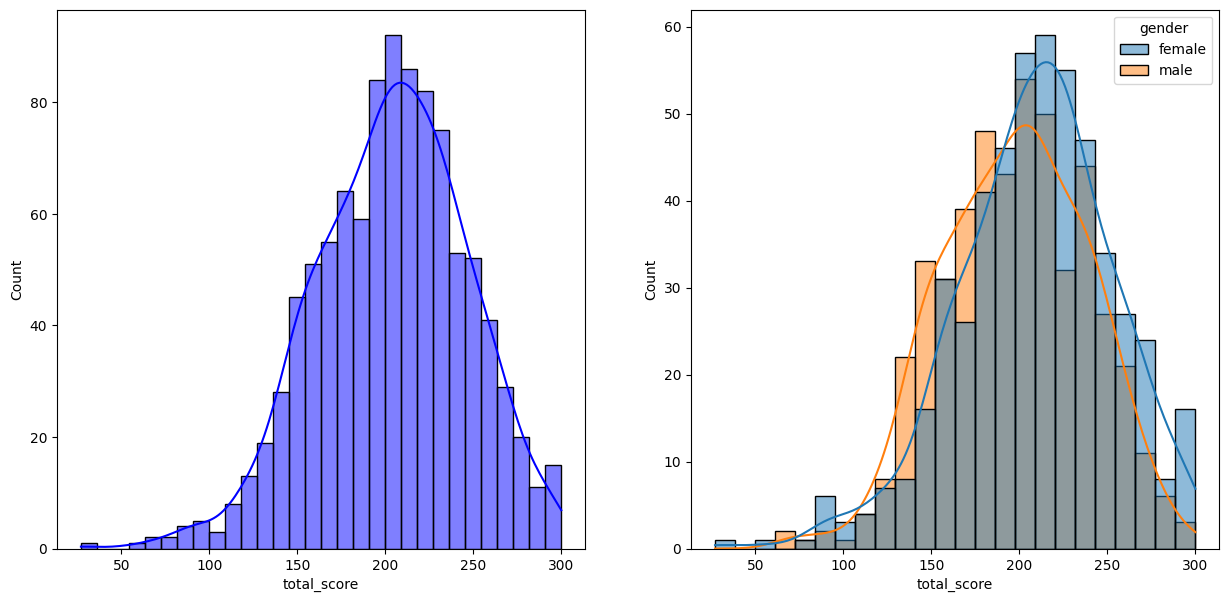

In [246]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data = df, x = "total_score", bins = 30, kde = True, color = "b")
plt.subplot(122)
sns.histplot(data = df, x = "total_score", kde = True, hue = "gender")
plt.show()

Insights: Female perform better than males in the exam.

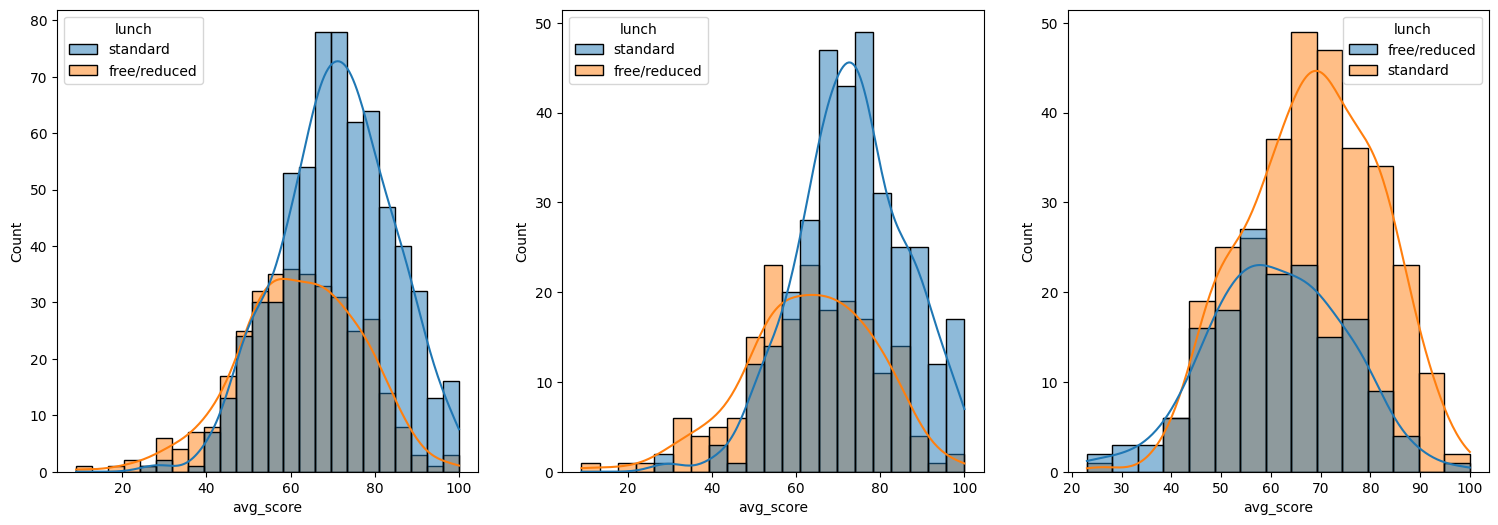

In [247]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data = df, x = "avg_score", kde = True, hue = "lunch")
plt.subplot(142)
sns.histplot(data = df[df.gender == "female"], x = "avg_score", kde = True, hue = "lunch")
plt.subplot(143)
sns.histplot(data=df[df.gender == "male"], x = "avg_score", kde = True, hue = "lunch")
plt.show()

Insights: Standard Lunch helps to excel in the exam irrespective of gender.

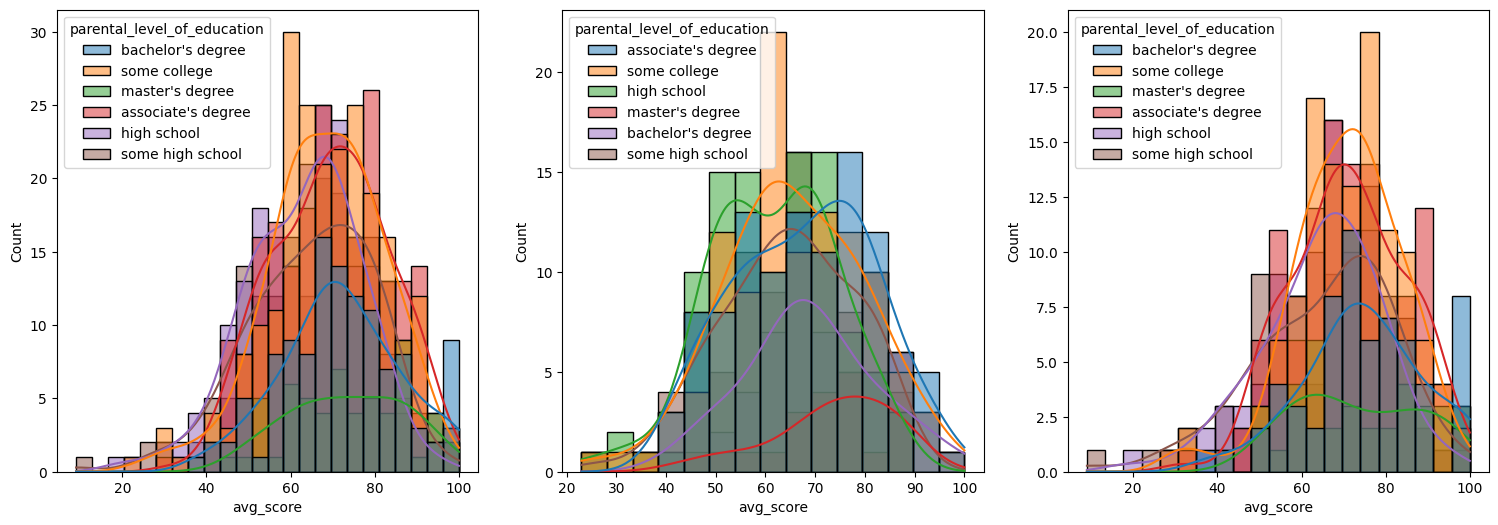

In [248]:
plt.subplots(1, 3 ,figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data = df, x = "avg_score", kde = True, hue = "parental_level_of_education")
plt.subplot(142)
ax = sns.histplot(data = df[df.gender == "male"], x = "avg_score", kde = True, hue = "parental_level_of_education")
plt.subplot(143)
ax = sns.histplot(data = df[df.gender == "female"], x = "avg_score", kde = True, hue = "parental_level_of_education")
plt.show()

Insights:
1. Parental Education has no direct co-relation on child's exam.
2. For a male child, parents education level is inversly proportional to child's performance in exam.
3. For a female child, parents education level is directly proportional to child's performance in exam, except in case of master's degree.

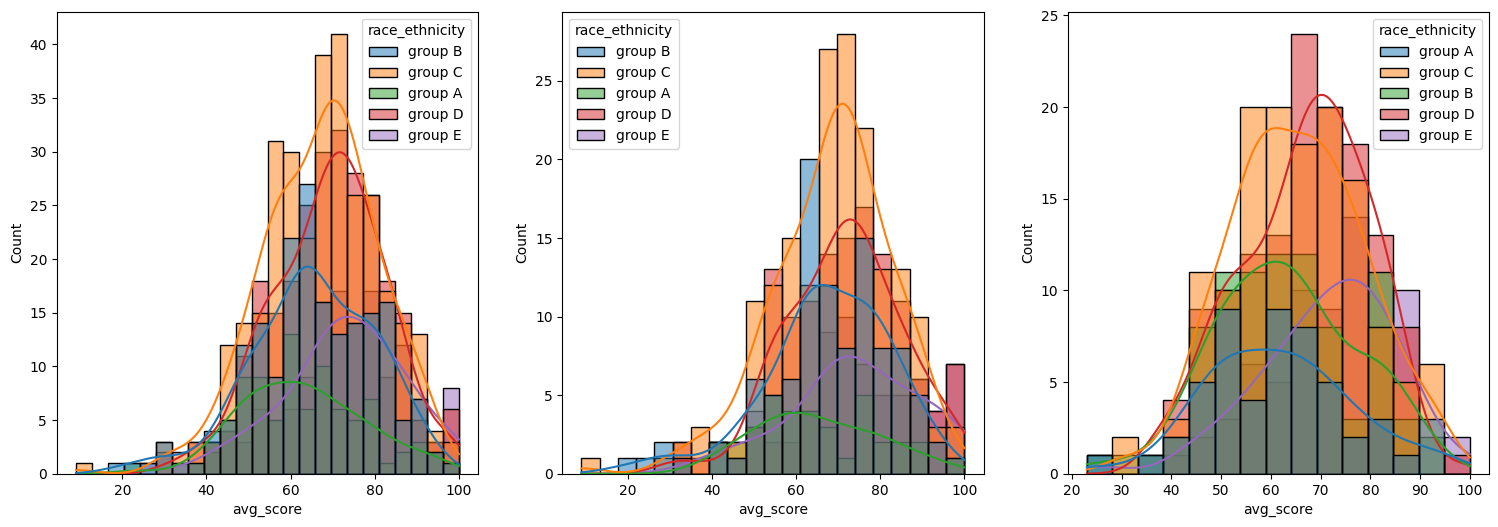

In [249]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data = df, x = "avg_score", kde = True, hue = "race_ethnicity")
plt.subplot(142)
ax = sns.histplot(data = df[df.gender == "female"], x = "avg_score", kde = True, hue = "race_ethnicity")
plt.subplot(143)
ax = sns.histplot(data = df[df.gender == "male"], x = "avg_score", kde = True, hue = "race_ethnicity")
plt.show()

Insights:
1. Group C and D outperforms in both male and female categories.
2. Group A are a poor performer in all categories.

<Axes: xlabel='writing_score', ylabel='Count'>

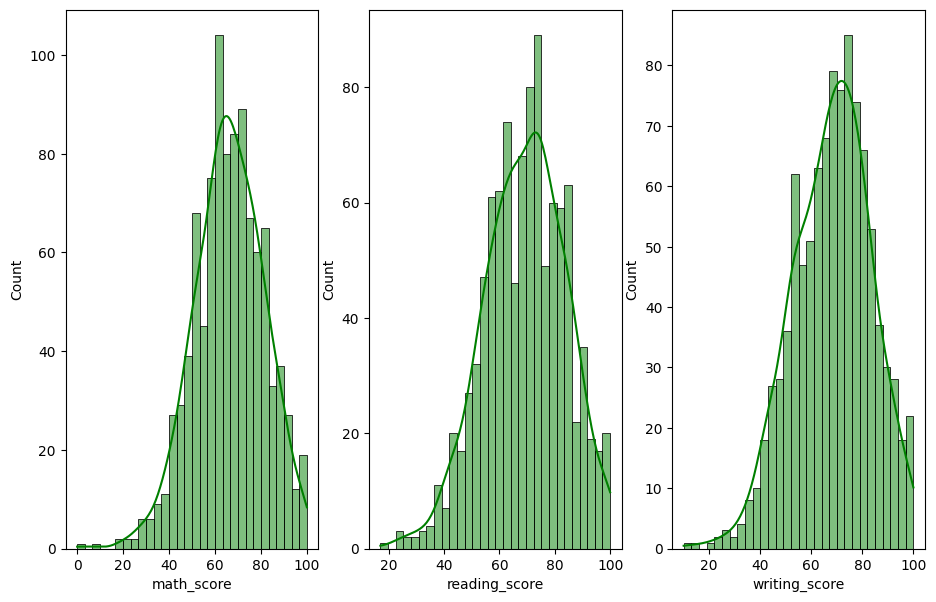

In [250]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
plt.subplot(1, 4, 1)
sns.histplot(data = df, x='math_score', bins=30, kde=True, color='g')
plt.subplot(1, 4, 2)
sns.histplot(data = df, x='reading_score', bins=30, kde=True, color='g')
plt.subplot(1, 4, 3)
sns.histplot(data = df, x='writing_score', bins=30, kde=True, color='g')

Insights:
1. Avg score in each subject is around 60 to 80 marks.

**4.2 Univariate Analysis**

4.2.1 Pie Plot Base Univariate Analysis

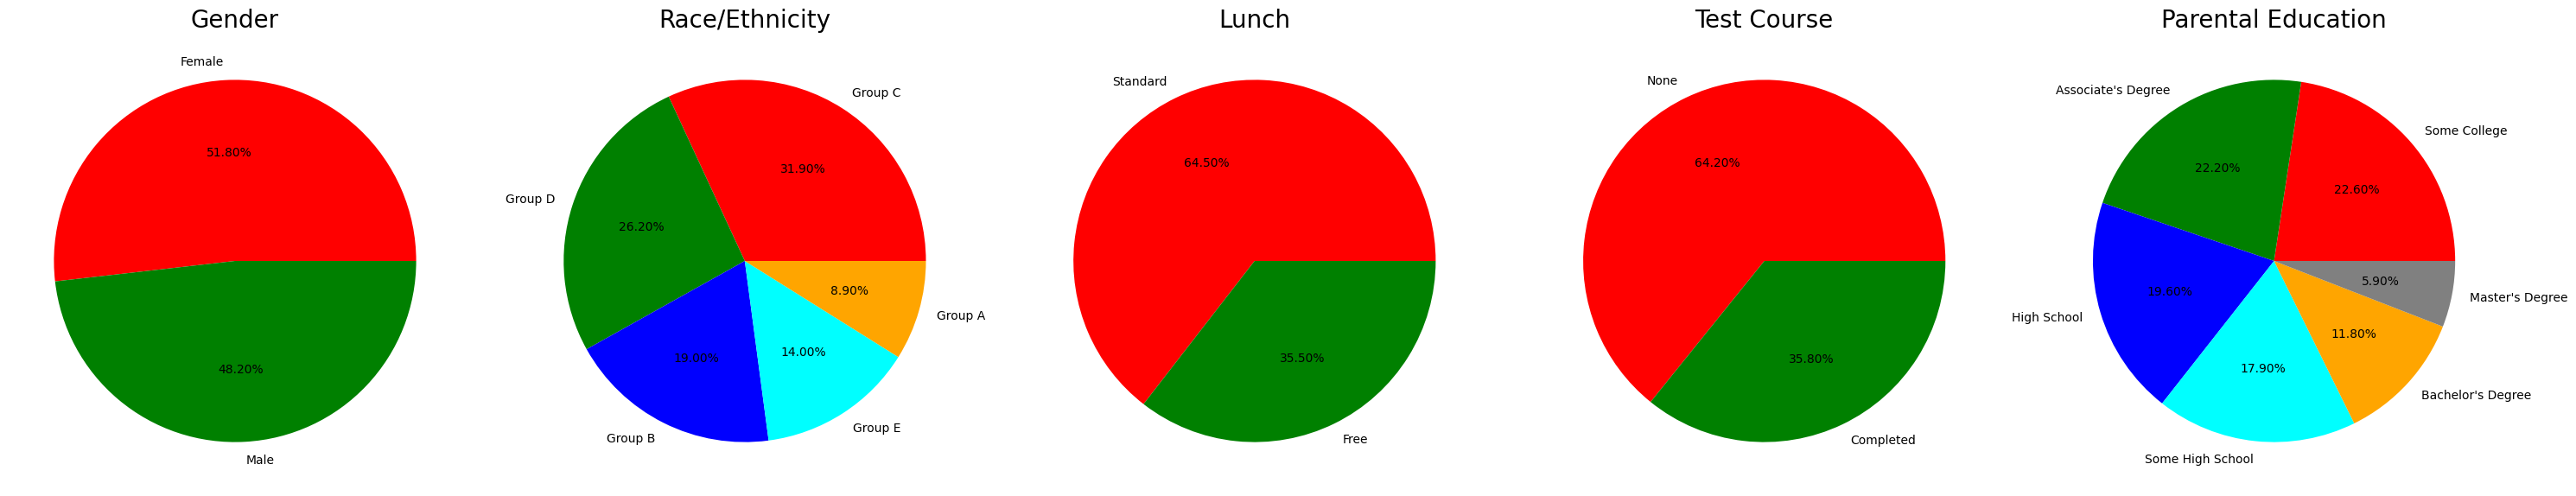

In [251]:
plt.rcParams["figure.figsize"] = (30, 12)

plt.subplot(1, 5, 1)
size = df["gender"].value_counts()
labels = "Female", "Male"
color = ["red", "green"]

plt.pie(size, colors = color, labels = labels,autopct = "%1.2f%%")
plt.title("Gender", fontsize = 20)
plt.axis("off")

plt.subplot(1, 5, 2)
size = df["race_ethnicity"].value_counts()
labels = "Group C", "Group D", "Group B", "Group E", "Group A"              # The order of label should be in descending order. So output of size should be verified.
color = ["red", "green", "blue", "cyan", "orange"]

plt.pie(size, colors = color,labels = labels,autopct = "%1.2f%%")
plt.title("Race/Ethnicity", fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df.lunch.value_counts()
labels = "Standard", "Free"
color = ["red", "green"]

plt.pie(size, colors = color, labels = labels, autopct = '%1.2f%%')
plt.title("Lunch", fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df.test_preparation_course.value_counts()
labels = "None", "Completed"
color = ["red", "green"]

plt.pie(size, colors = color, labels = labels, autopct = "%1.2f%%")
plt.title("Test Course", fontsize = 20)
plt.axis("off")


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = "Some College", "Associate's Degree", "High School", "Some High School", "Bachelor's Degree", "Master's Degree"
color = ["red", "green", "blue", "cyan", "orange", "grey"]

plt.pie(size, colors = color,labels = labels, autopct = "%1.2f%%")
plt.title("Parental Education", fontsize = 20)
plt.axis("off")

plt.tight_layout()
plt.grid()

plt.show()

Insights:
1. There are more females than males.
2. Group C is the biggest racial/ethnic group.
3. Most students prefer Standard lunch.
4. Majority students have not participated in the test course.
5. Majority parents have Associate's Degree.

4.2.2 Bar Plot Based Univariate Analysis

<Axes: xlabel='gender', ylabel='count'>

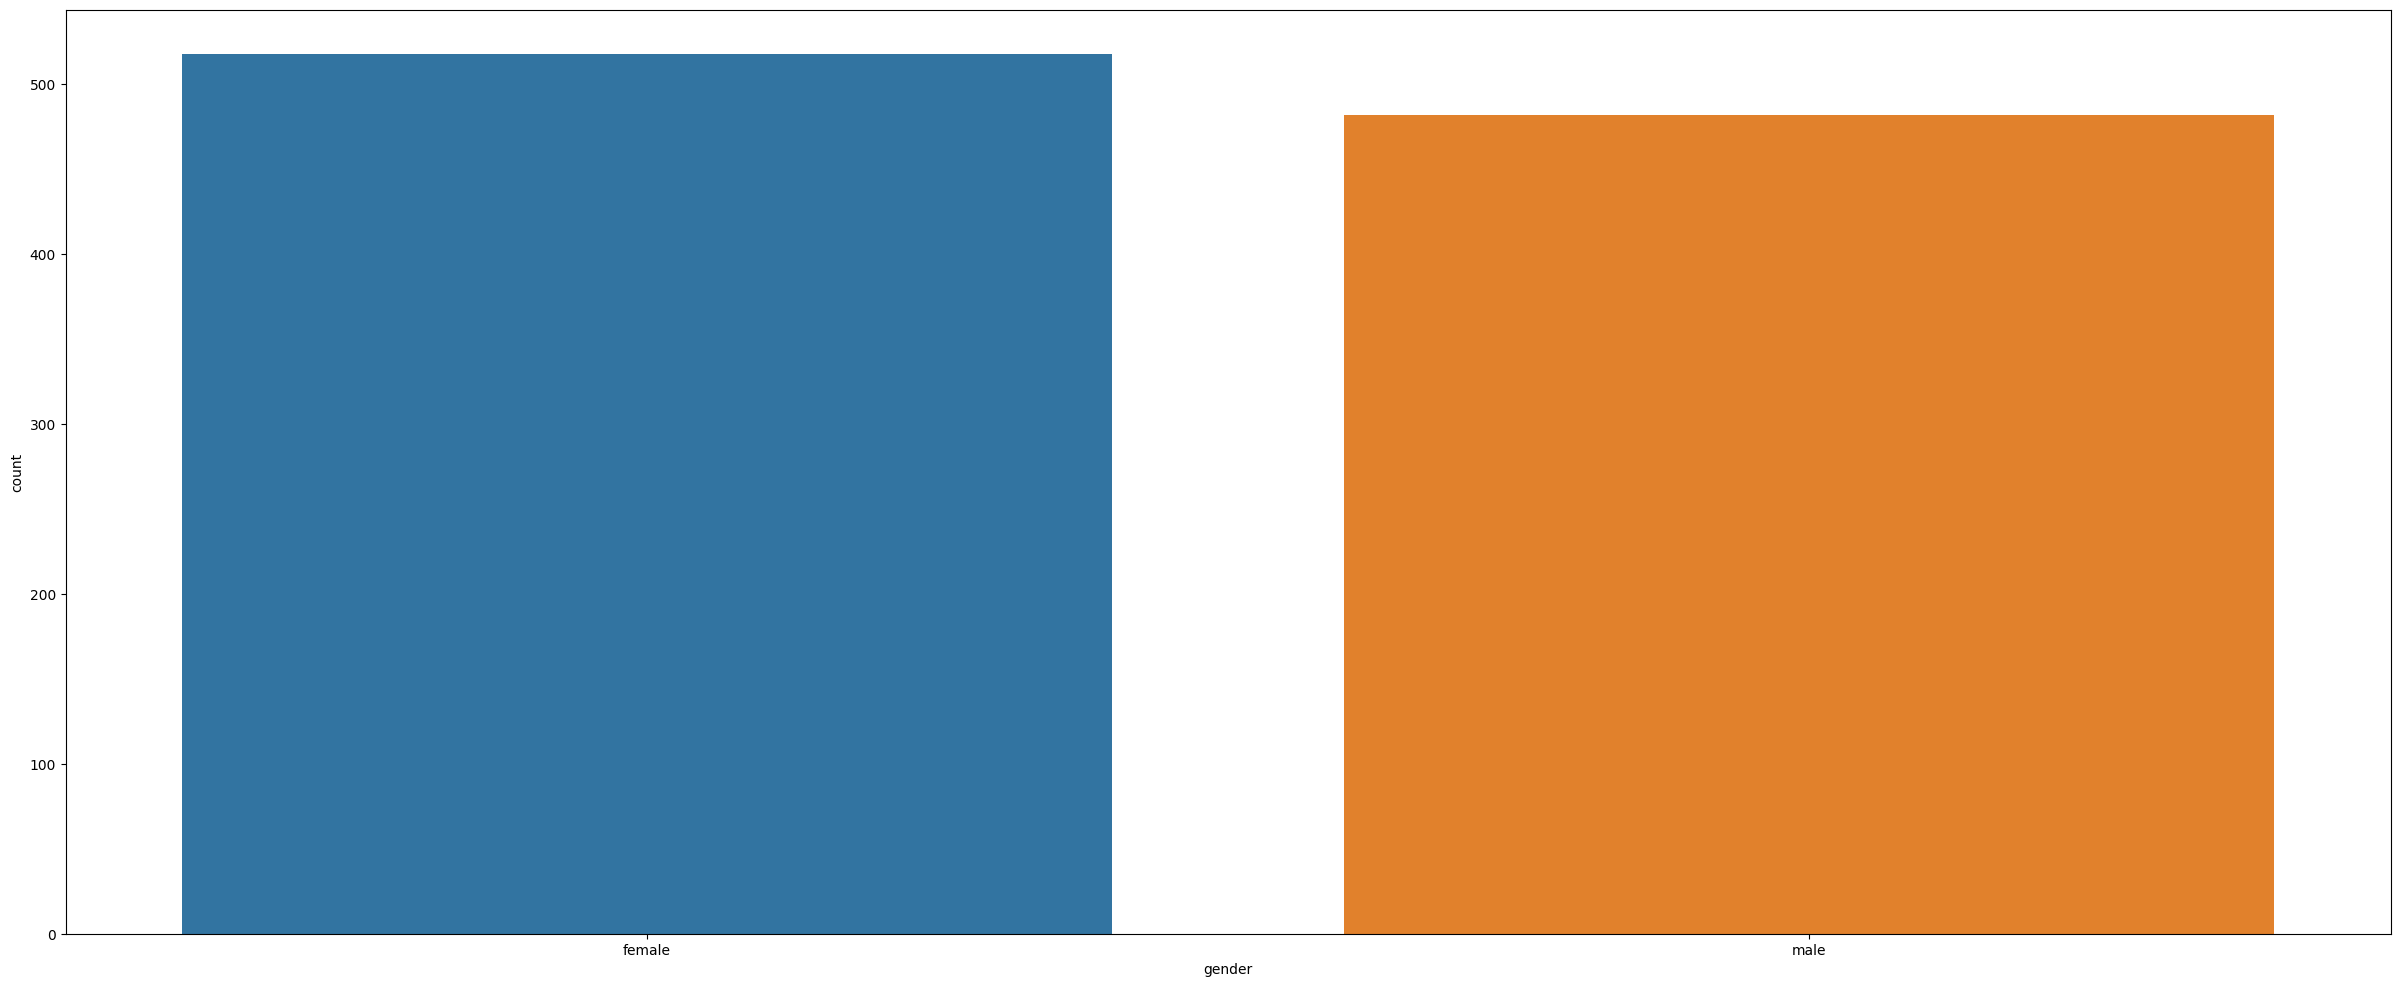

In [252]:
# Gender Analysis
  
sns.countplot(data = df, x = "gender")

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


<Axes: xlabel='race_ethnicity', ylabel='count'>

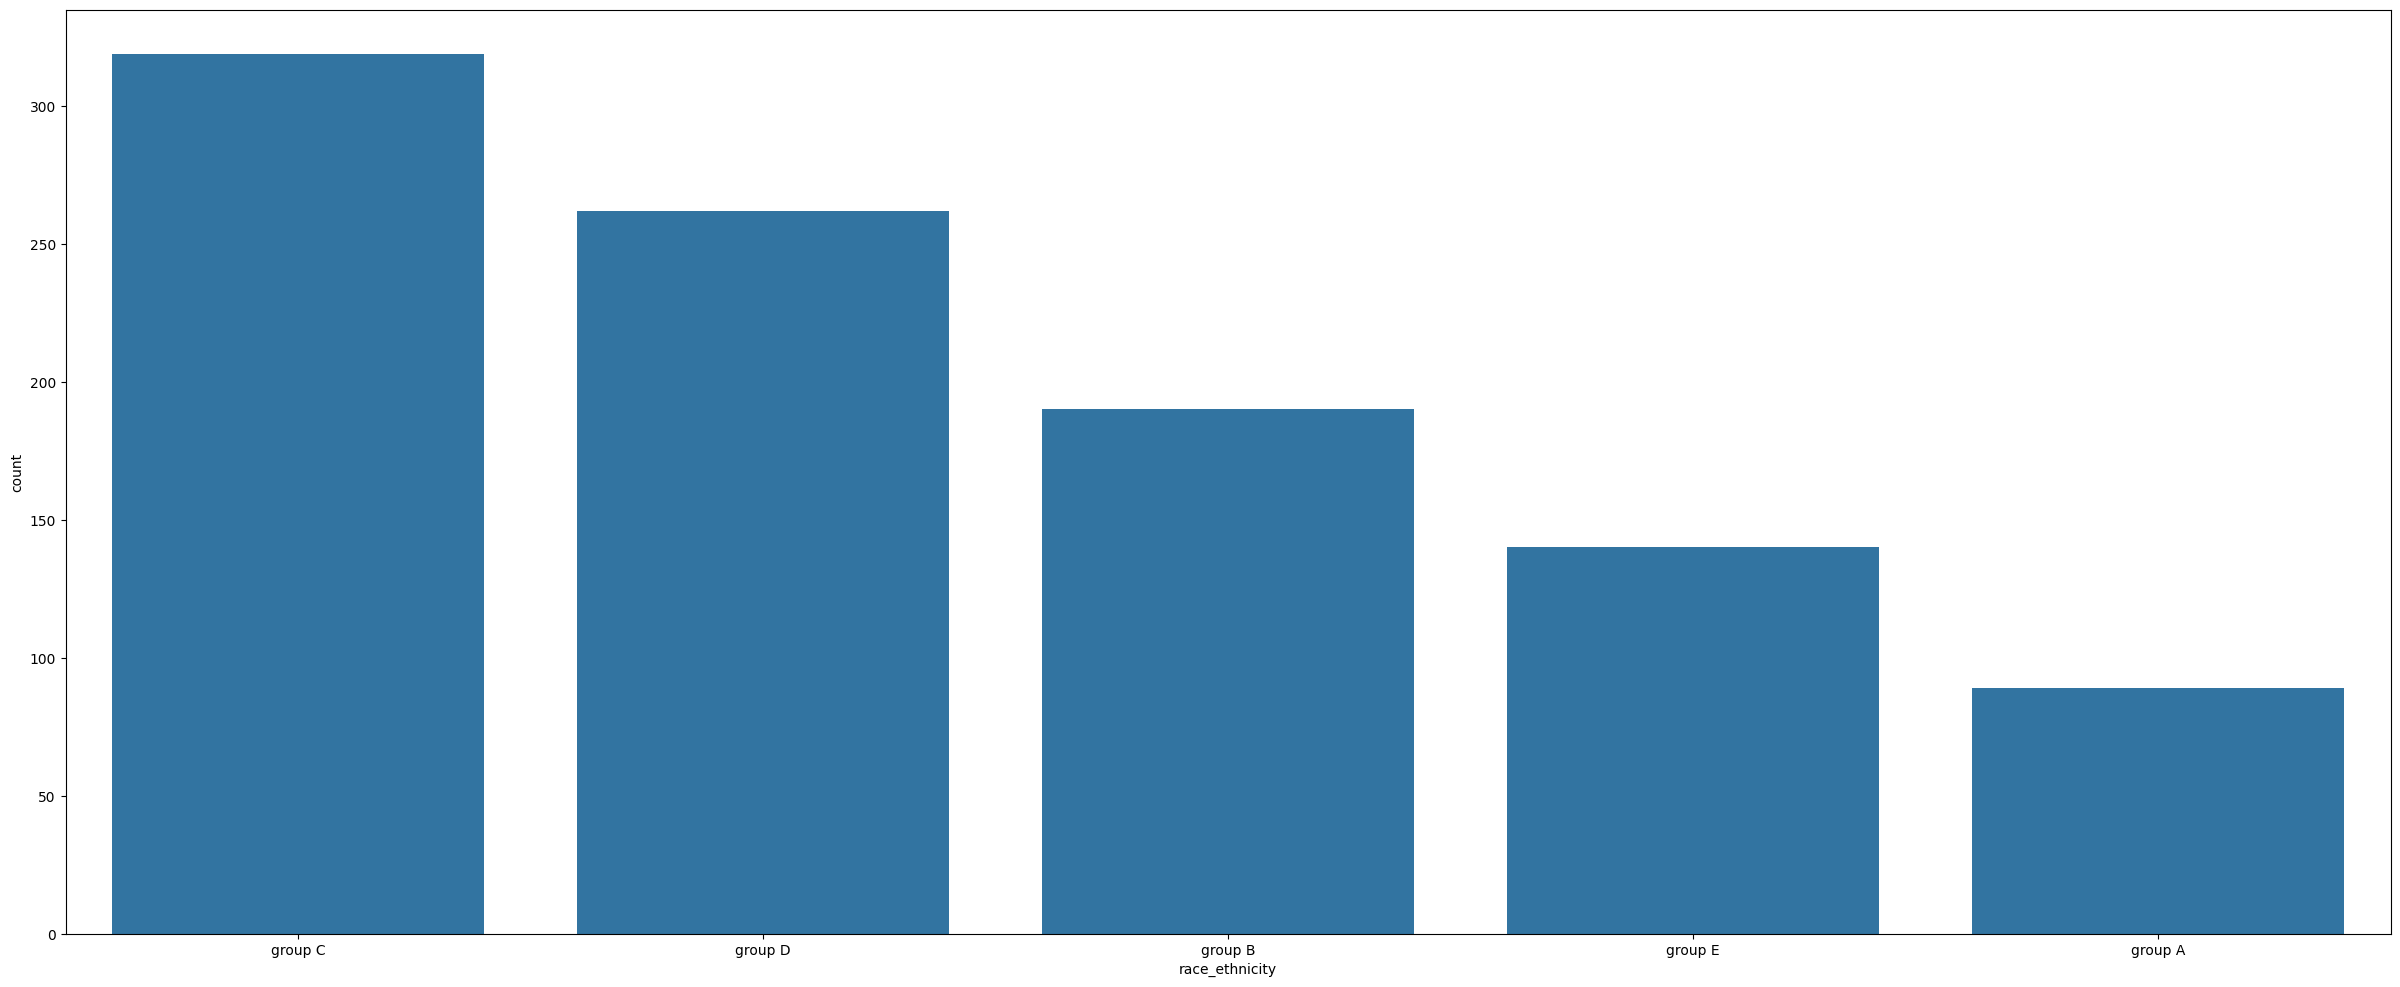

In [253]:
# Race/Ethinicity Analysis:

race_counts = df.race_ethnicity.value_counts()
print (race_counts)

base_color = sns.color_palette()[0]

sns.countplot(data = df, x = "race_ethnicity", color = base_color, order = race_counts.index)

<Axes: xlabel='lunch', ylabel='count'>

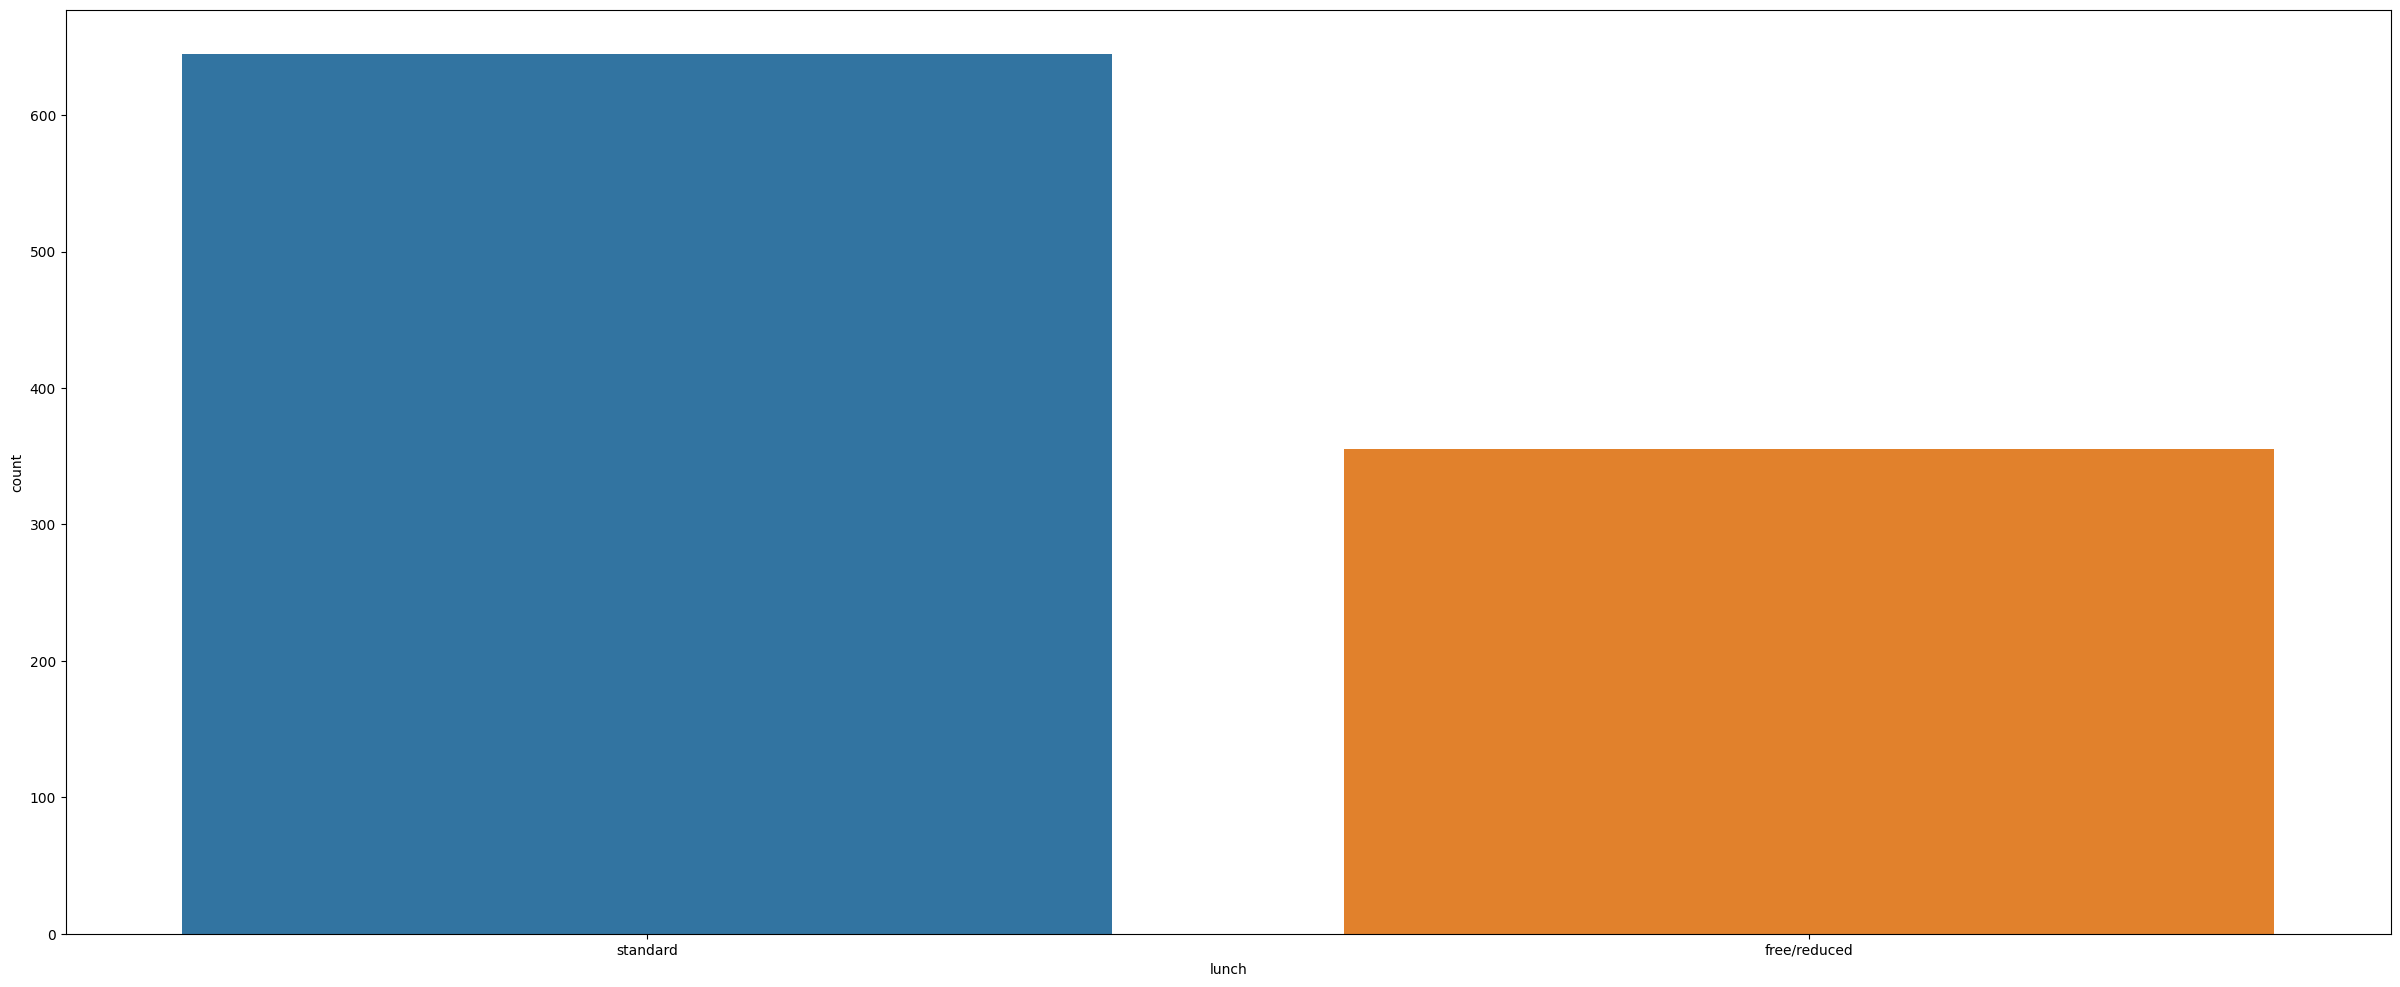

In [254]:
sns.countplot(data = df, x = "lunch")

<Axes: xlabel='test_preparation_course', ylabel='count'>

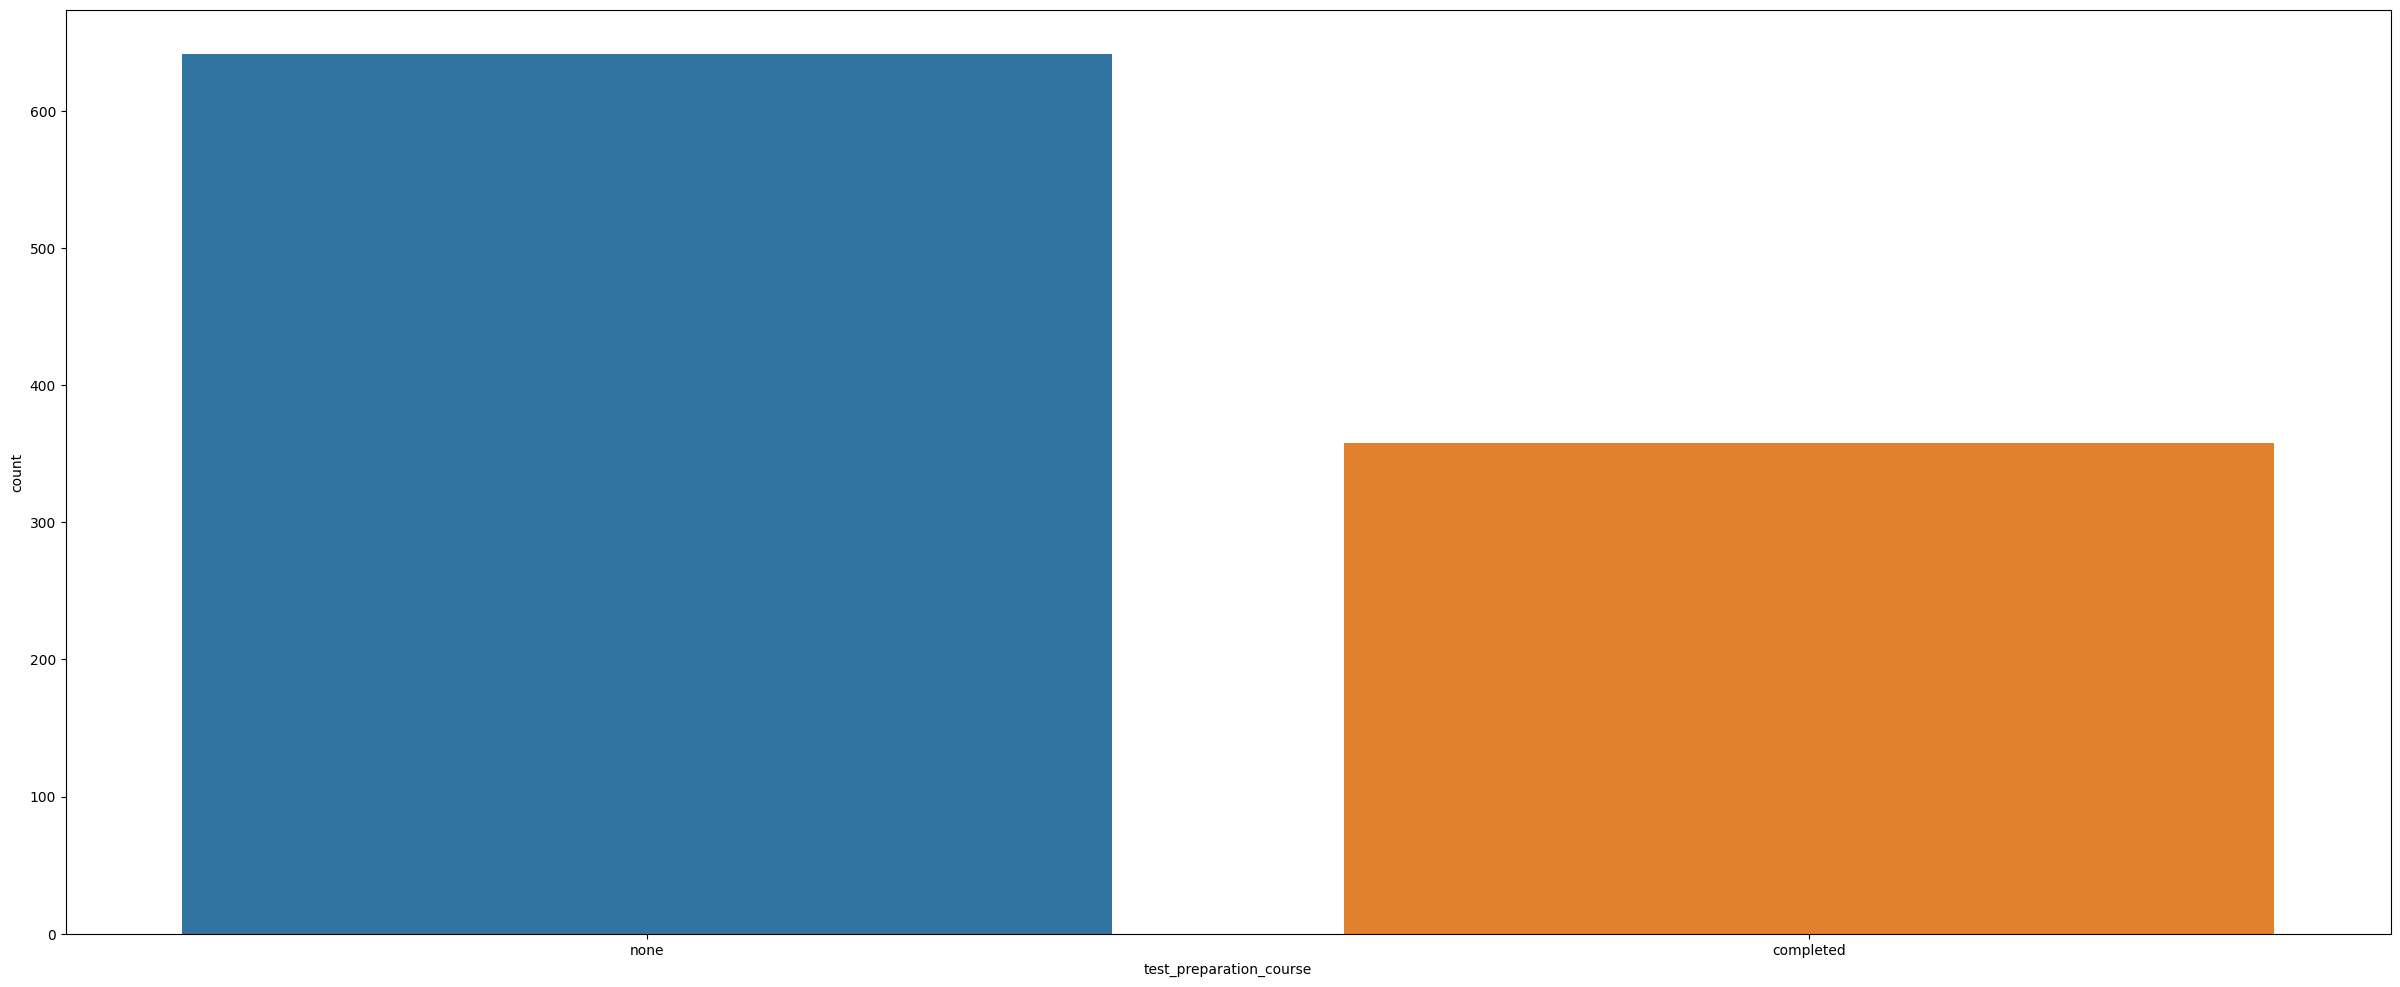

In [255]:
sns.countplot(data = df, x = "test_preparation_course")

<Axes: xlabel='parental_level_of_education', ylabel='count'>

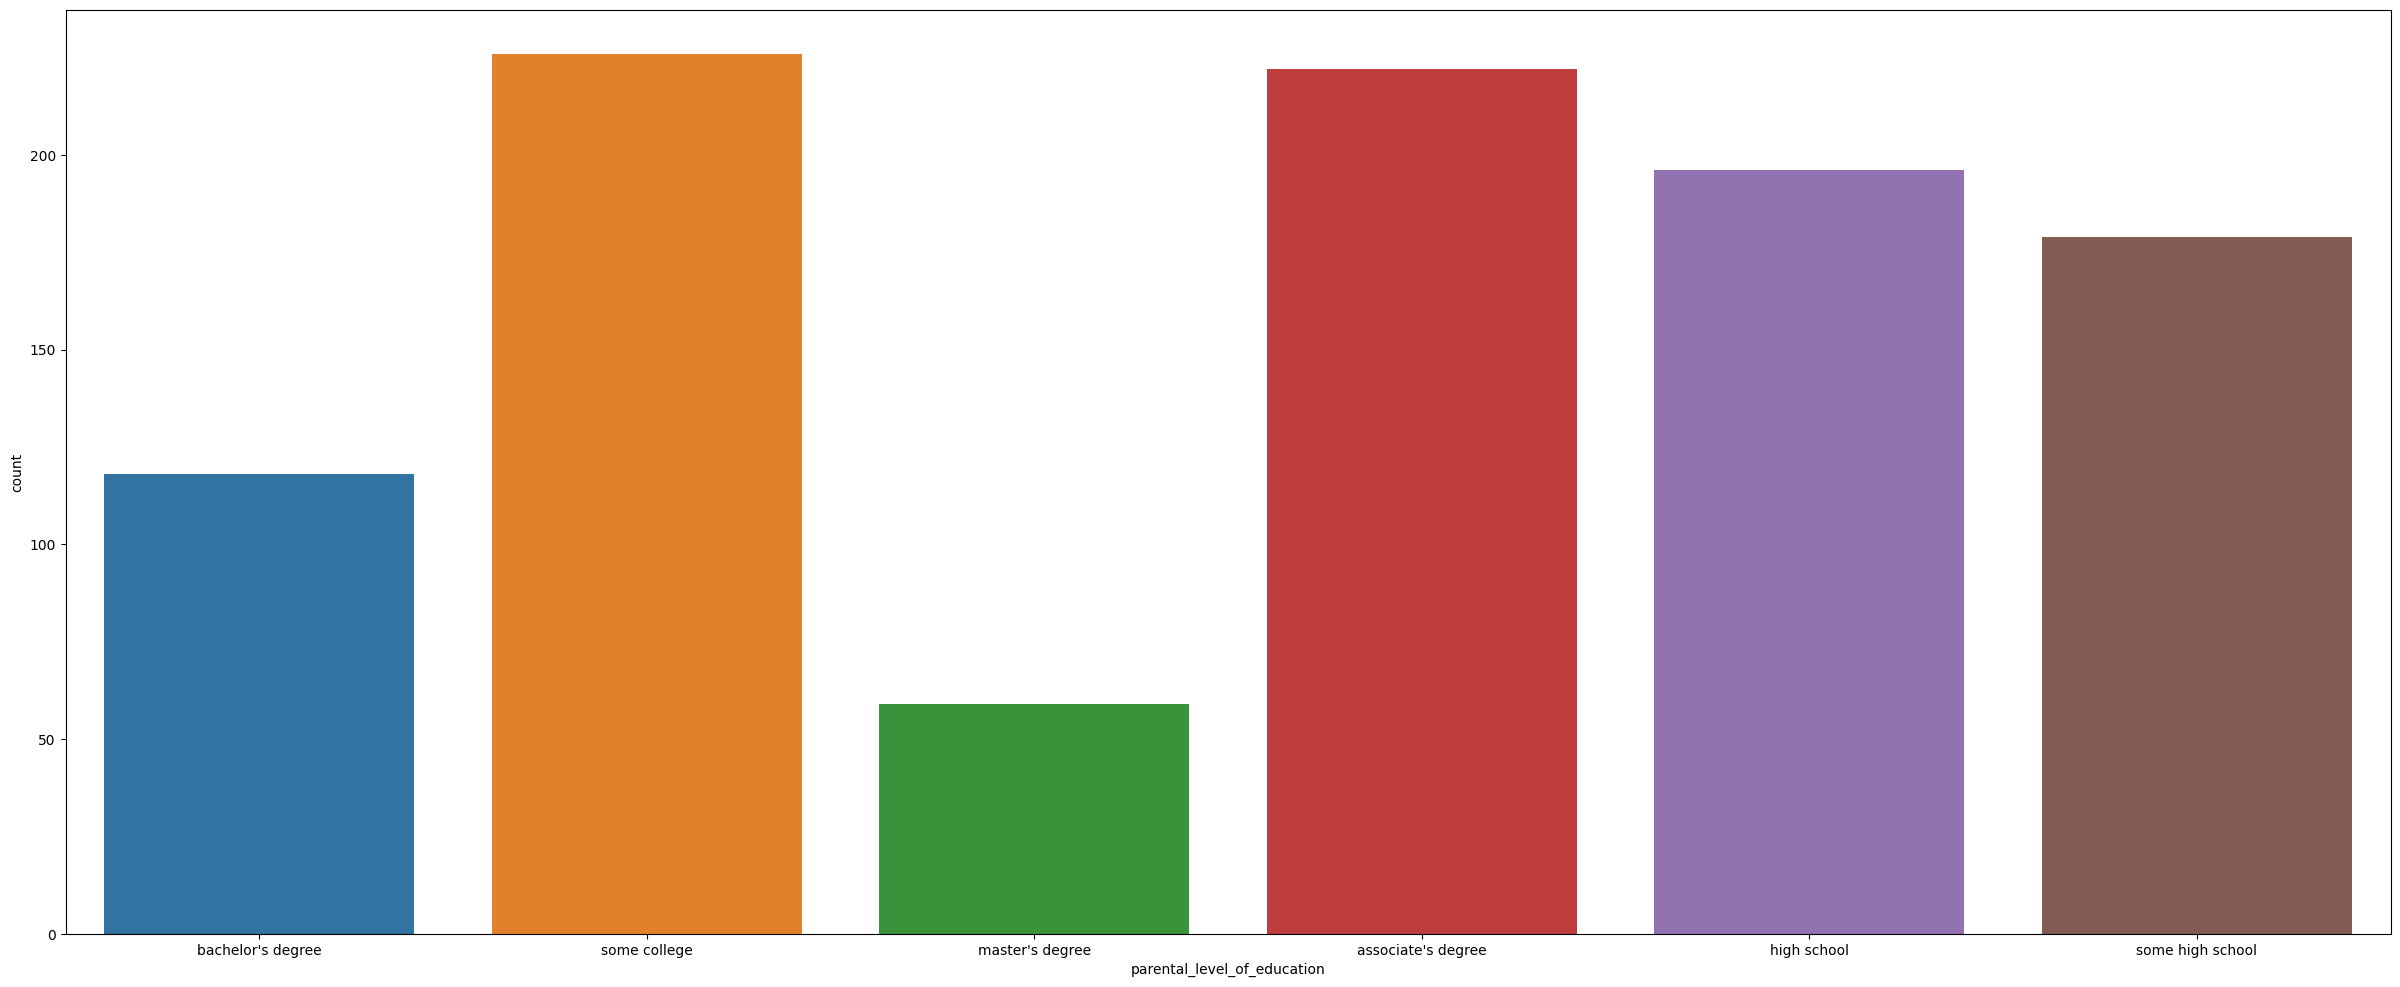

In [256]:
sns.countplot(data = df, x = "parental_level_of_education")

Insights:
1. Marginal difference between number of males and females, in favor of female students.
2. Majority of students are from Group C.
3. Majority of students have normal lunch. Around 350 students prefer free lunch, showcasing their financial condition.
4. Around 65% students have not opted for test preparation course.
5. Majority students' parents have attend some college or have Associate's degree.

**4.3 Feature Wise Data Visualisation:**

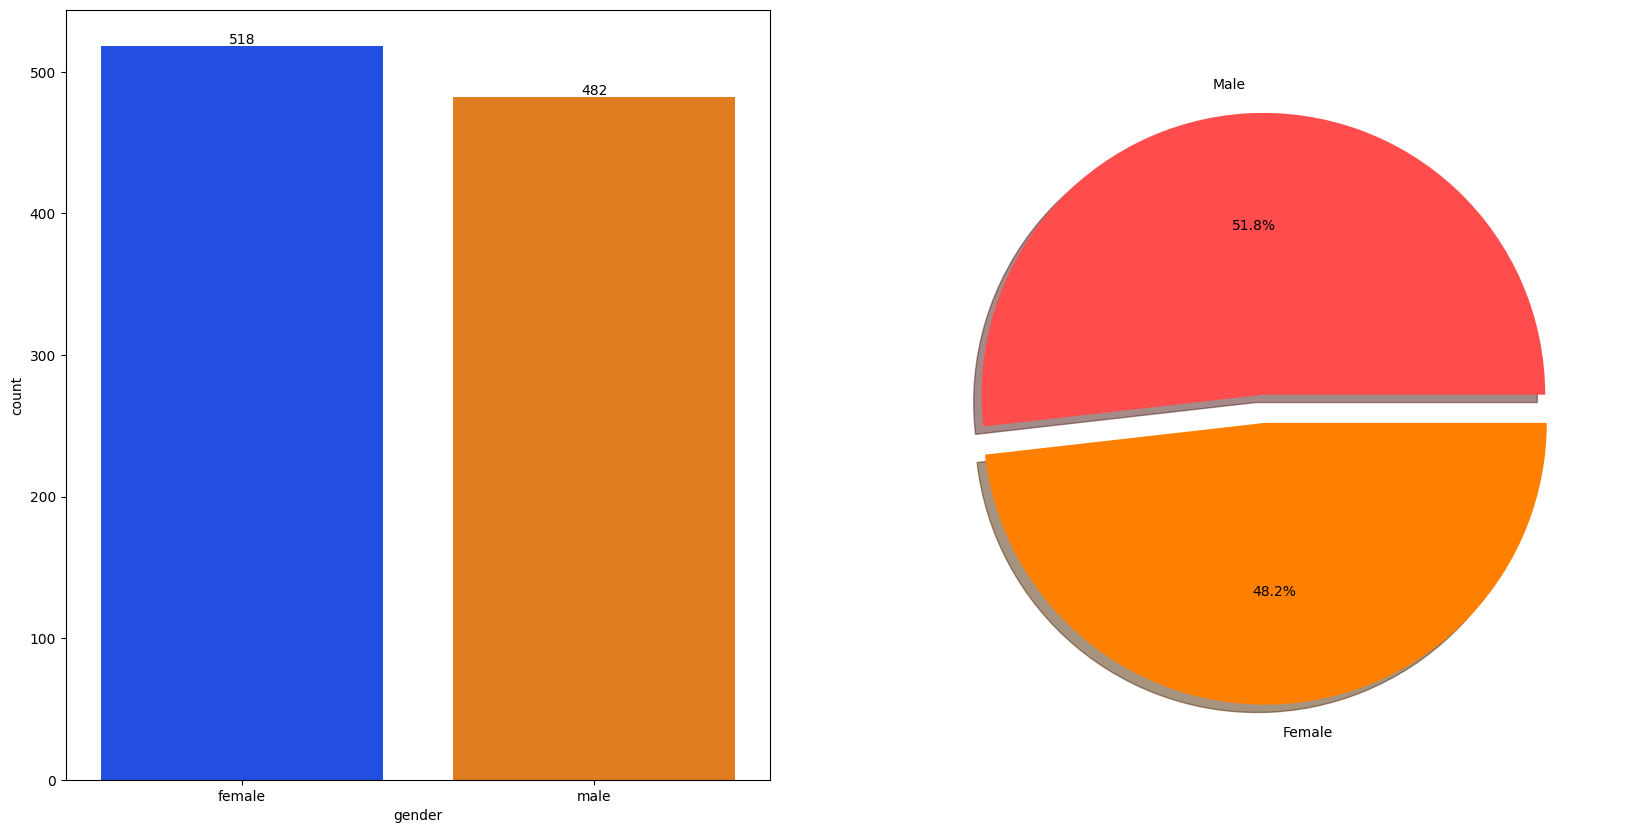

In [257]:
# Univariate Analysis on Gender:

f, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.countplot(x = df.gender, data = df, palette = "bright", ax = ax[0], saturation = 0.75)
for container in ax[0].containers:
    ax[0].bar_label(container, color = "black", size = 10)
    
plt.pie(x = df.gender.value_counts(), labels=["Male", "Female"], explode = [0,0.1], autopct="%1.1f%%", shadow = True, colors = ["#ff4d4d", "#ff8000"])
plt.show()

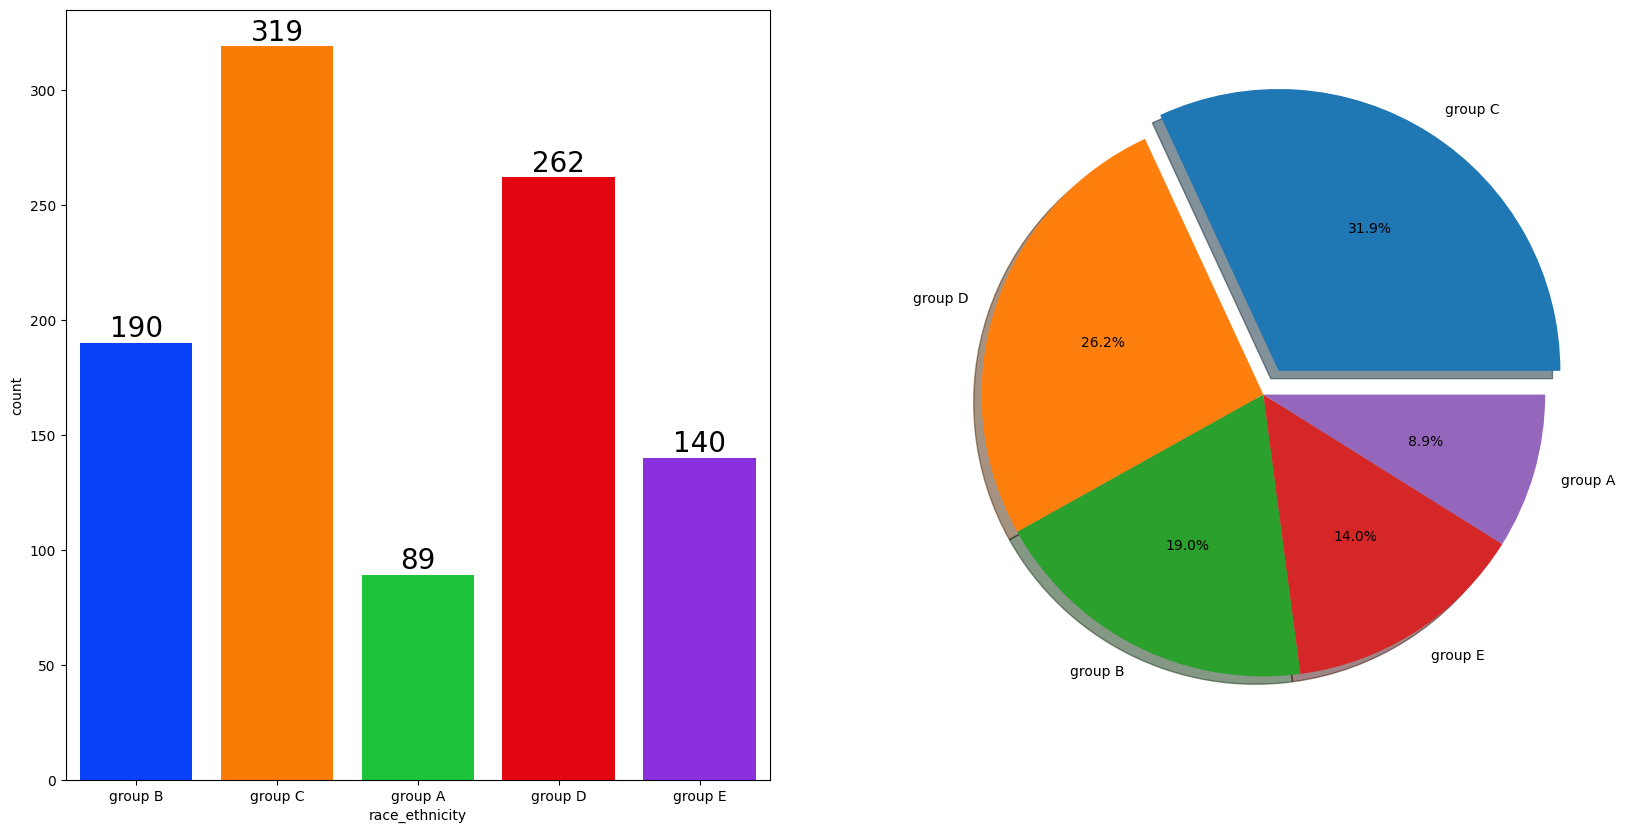

In [280]:
# Univariate Analysis on Race_Ethnicity:
 
f, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.countplot(x = df.race_ethnicity, data = df, palette = "bright", ax = ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = "black", size=20)
    
plt.pie(x = df.race_ethnicity.value_counts(),labels=df.race_ethnicity.value_counts().index, explode=[0.1, 0, 0, 0, 0], autopct = "%1.1f%%", shadow = True)
plt.show() 

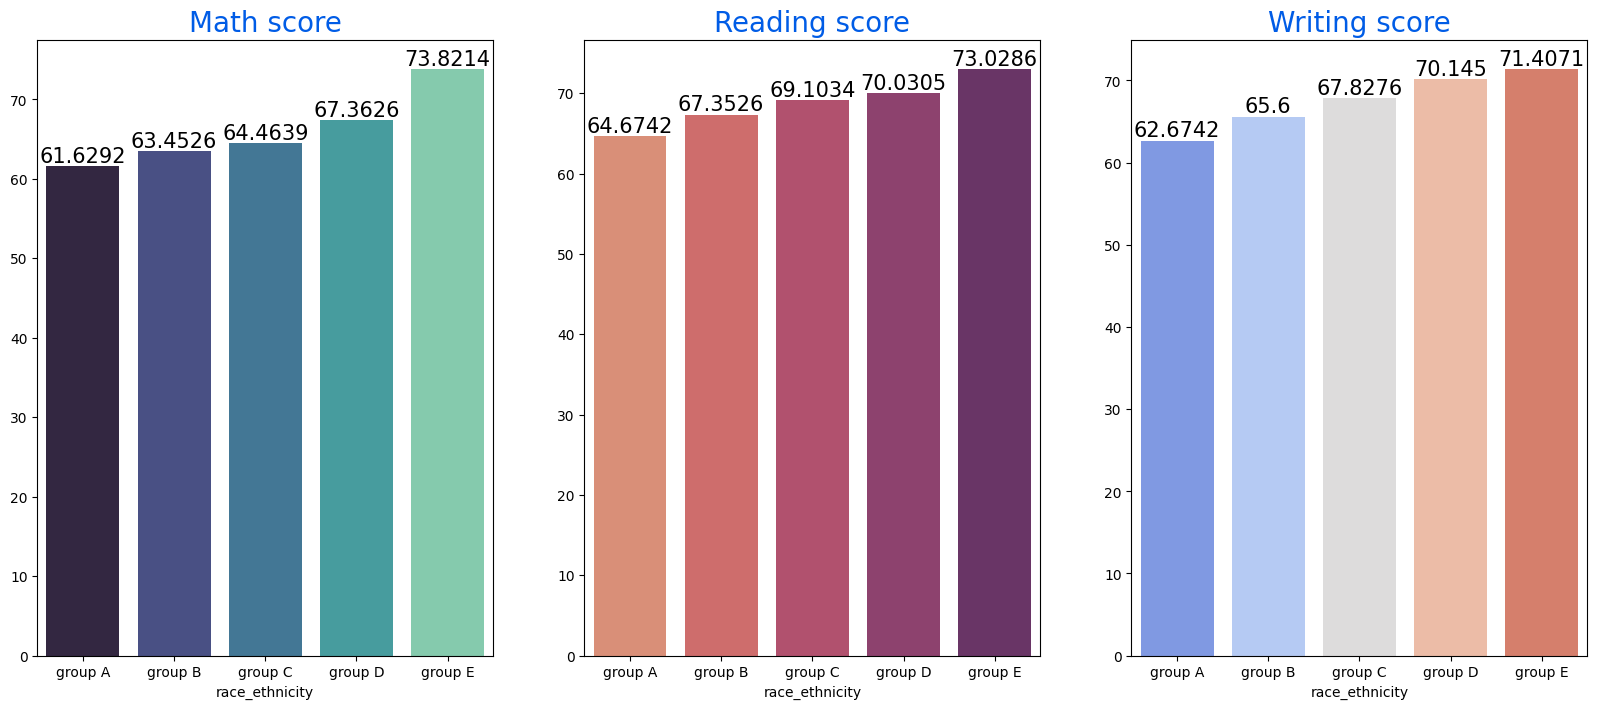

In [288]:
# Bivariate Analysis on Race_Ethnicity:

race_group = df.groupby('race_ethnicity')
race_group

f, ax = plt.subplots(1, 3, figsize = (20, 8))

sns.barplot(x = race_group.math_score.mean().index, y = race_group.math_score.mean().values, palette = "mako", ax = ax[0])
ax[0].set_title("Math score", color = "#005ce6", size = 20)

for container in ax[0].containers:
    ax[0].bar_label(container, color = "black", size=15)

sns.barplot(x = race_group.reading_score.mean().index, y = race_group.reading_score.mean().values, palette = "flare", ax = ax[1])
ax[1].set_title("Reading score", color = "#005ce6", size = 20)

for container in ax[1].containers:
    ax[1].bar_label(container, color = "black", size=15)    

sns.barplot(x = race_group.writing_score.mean().index, y = race_group.writing_score.mean().values, palette = "coolwarm", ax = ax[2])
ax[2].set_title("Writing score", color = "#005ce6", size = 20)

for container in ax[2].containers:
    ax[2].bar_label(container, color = "black", size=15) 
    

Insights:
1. Students of Group E is smart amongst all the groups.
2. Students of Group E are wors performers in test.

**4.4 Bivariate Analysis:**

Text(0.5, 1.0, 'Writing score vs Reading score')

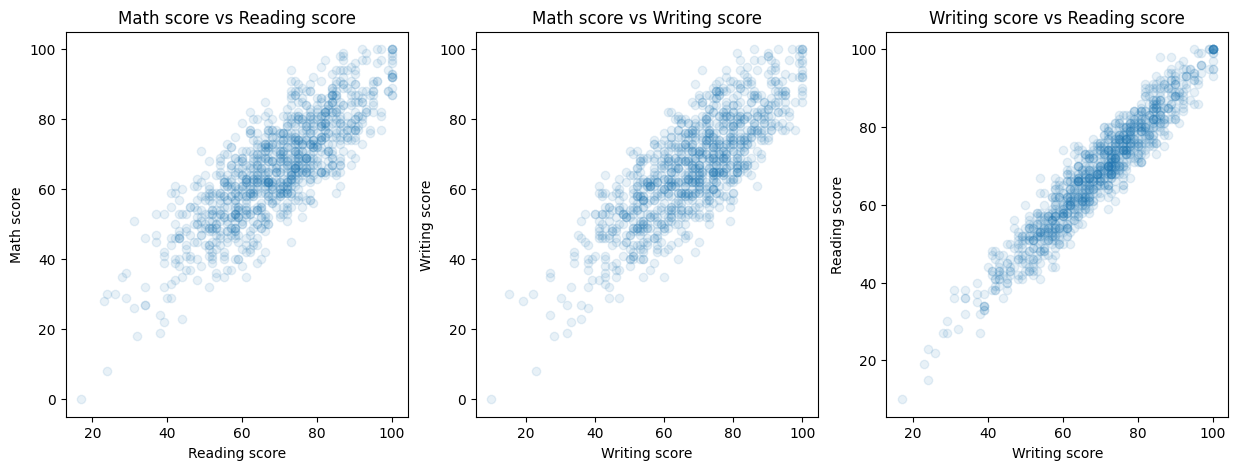

In [258]:
plt.figure(figsize = (15, 5))
alpha = 0.1

# math score vs reading score
plt.subplot(1, 3, 1) 
plt.scatter(y = df.math_score, x = df.reading_score, alpha = alpha) 
plt.xlabel("Reading score") 
plt.ylabel("Math score") 
plt.title("Math score vs Reading score") 

# math score vs writing score
plt.subplot(1, 3, 2) 
plt.scatter(y = df.math_score, x = df.writing_score, alpha = alpha)
plt.xlabel("Writing score")
plt.ylabel("Writing score")
plt.title("Math score vs Writing score")

# writing score vs reading score
plt.subplot(1, 3, 3)
plt.scatter(y = df.writing_score, x = df.reading_score, alpha = alpha)
plt.xlabel("Writing score")
plt.ylabel("Reading score")
plt.title("Writing score vs Reading score")

Insights:
1. Students have scored similar in Writing and Reading subjects.
2. As Writing and Reading scores highly co-related, they will carry less weight.

In [261]:
# Calculating weighted average score
 
df["weighted_avg_score"] = 0.5 * df.math_score + 0.25 * df.writing_score + 0.25 * df.reading_score
df.head()

df_mod = df.copy(deep = False)

df_mod.drop(columns = ["math_score", "reading_score", "writing_score"], inplace = True)

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score,weighted_avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.50
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,79.00
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,92.00
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,48.75
4,male,group C,some college,standard,none,76,78,75,229,76.333333,76.25


<Axes: xlabel='lunch', ylabel='count'>

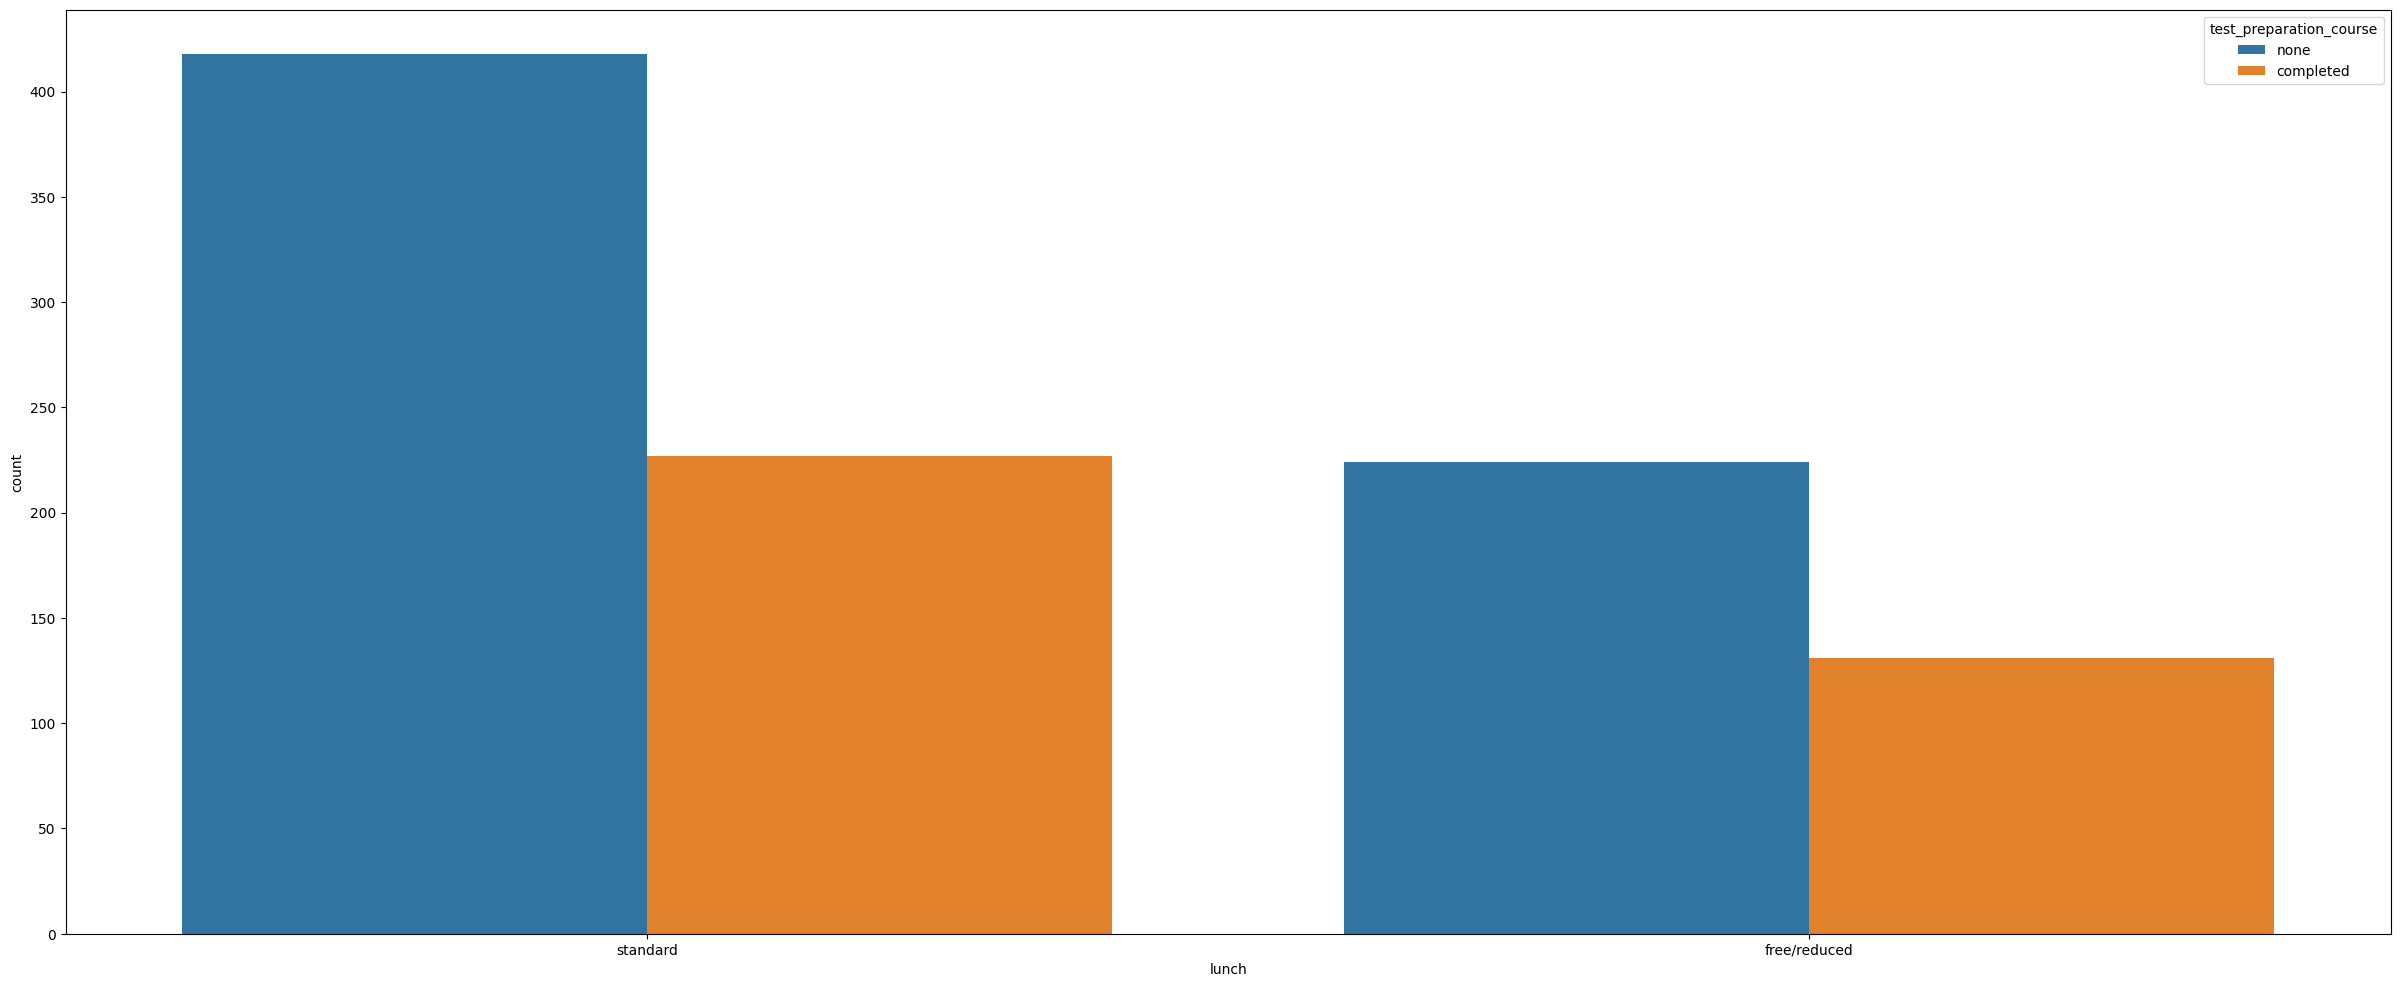

In [262]:
# Relation between  lunch and test preparation course:

sns.countplot(data = df, x = "lunch", hue = "test_preparation_course")

In [263]:
df.groupby("lunch")["test_preparation_course"].value_counts()

lunch         test_preparation_course
free/reduced  none                       224
              completed                  131
standard      none                       418
              completed                  227
Name: count, dtype: int64

Text(0, 0.5, 'Completion ratio')

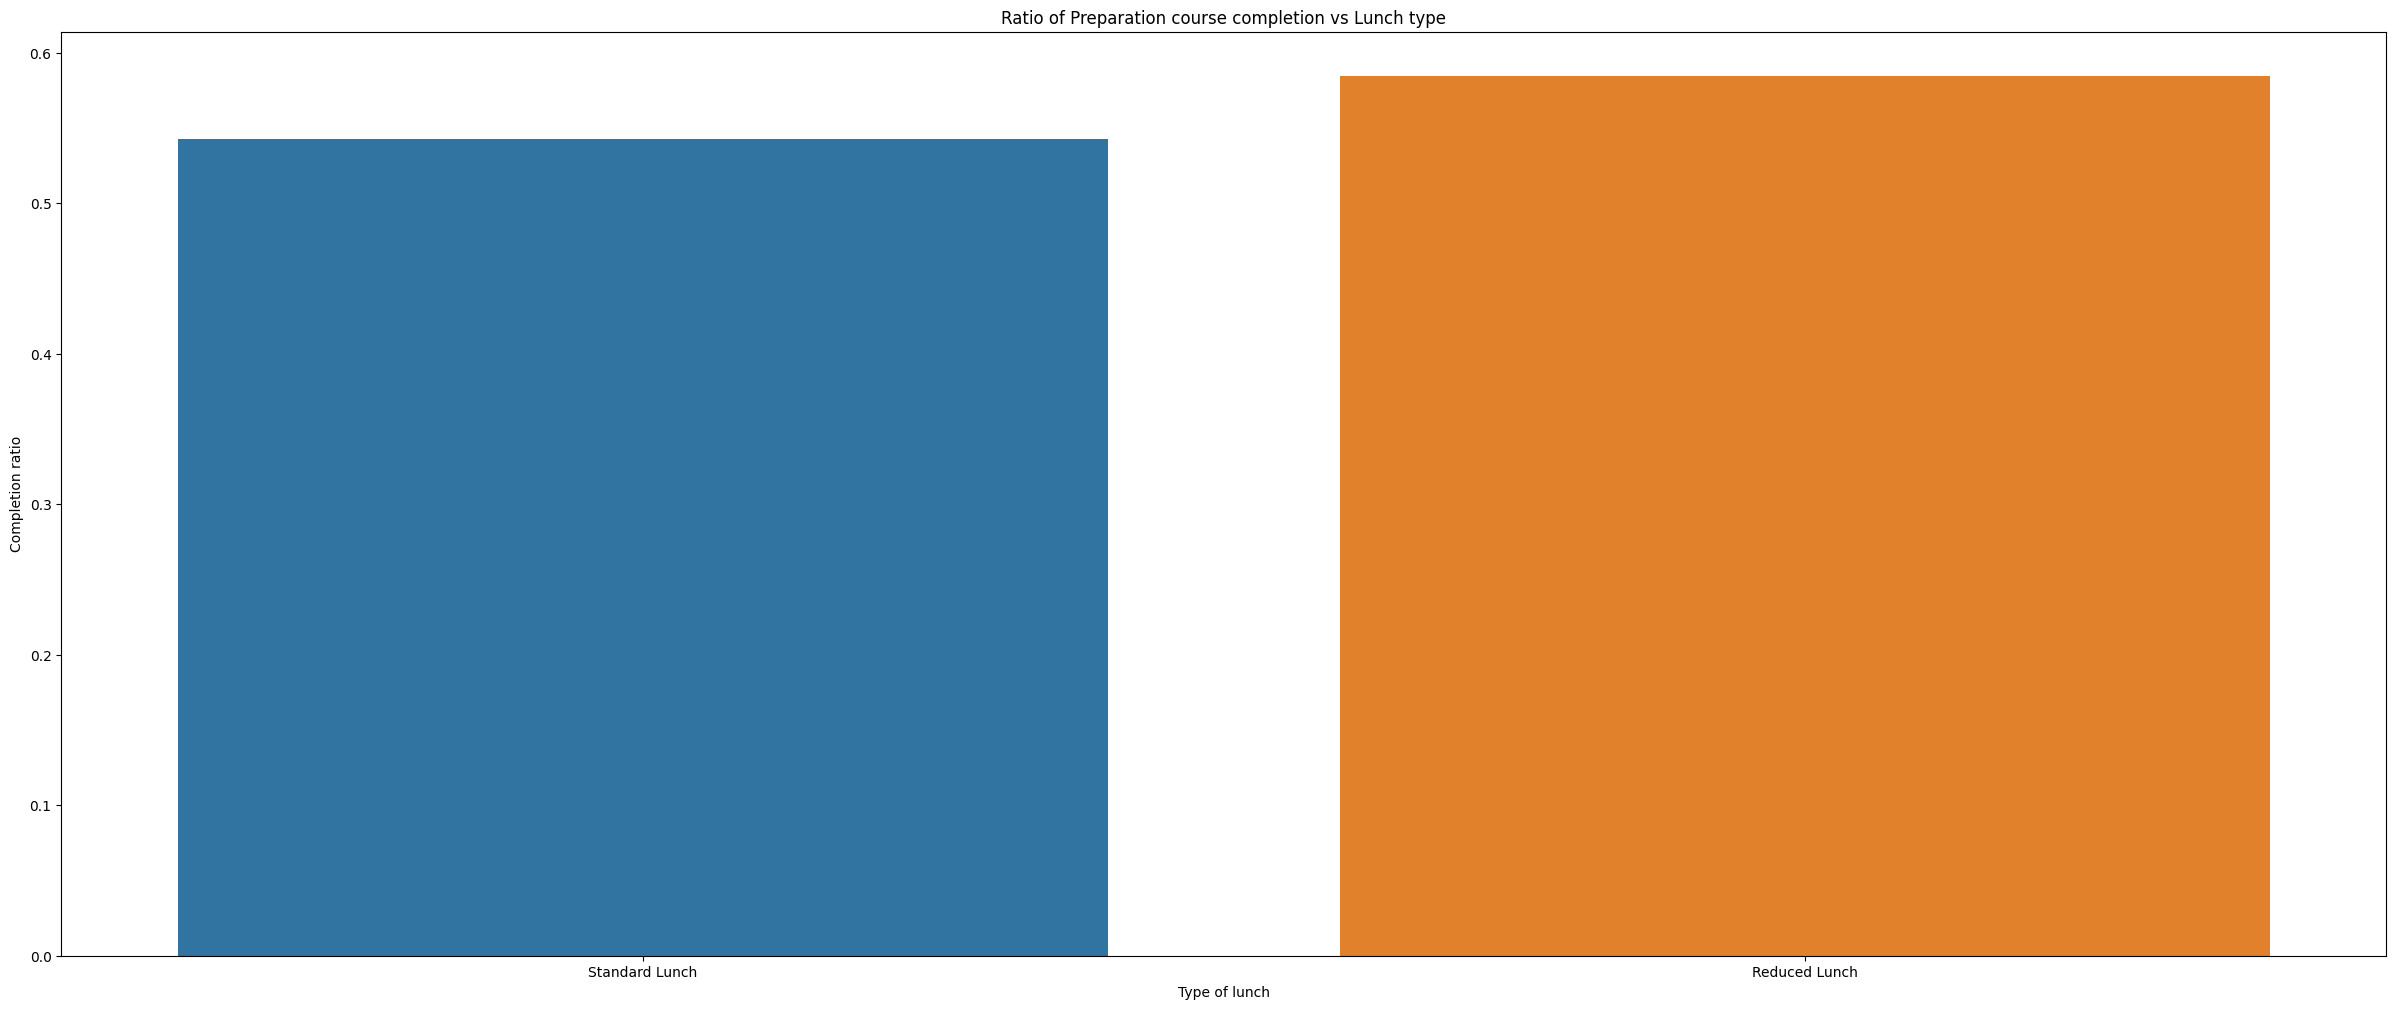

In [264]:
grouped = df.groupby("lunch")["test_preparation_course"].value_counts()

# get the ratios
comp_ratio_reduced =  grouped["free/reduced"]["completed"] / grouped["free/reduced"]["none"]
comp_ratio_standard = grouped["standard"]["completed"] / grouped["standard"]["none"]

# plot
sns.barplot(x = ["Standard Lunch", "Reduced Lunch"], 
            y = [comp_ratio_standard, comp_ratio_reduced ])
plt.title("Ratio of Preparation course completion vs Lunch type")
plt.xlabel("Type of lunch")
plt.ylabel("Completion ratio")

Insights:
1. Lunch doe not impact much on student's performance.

<Axes: xlabel='lunch', ylabel='count'>

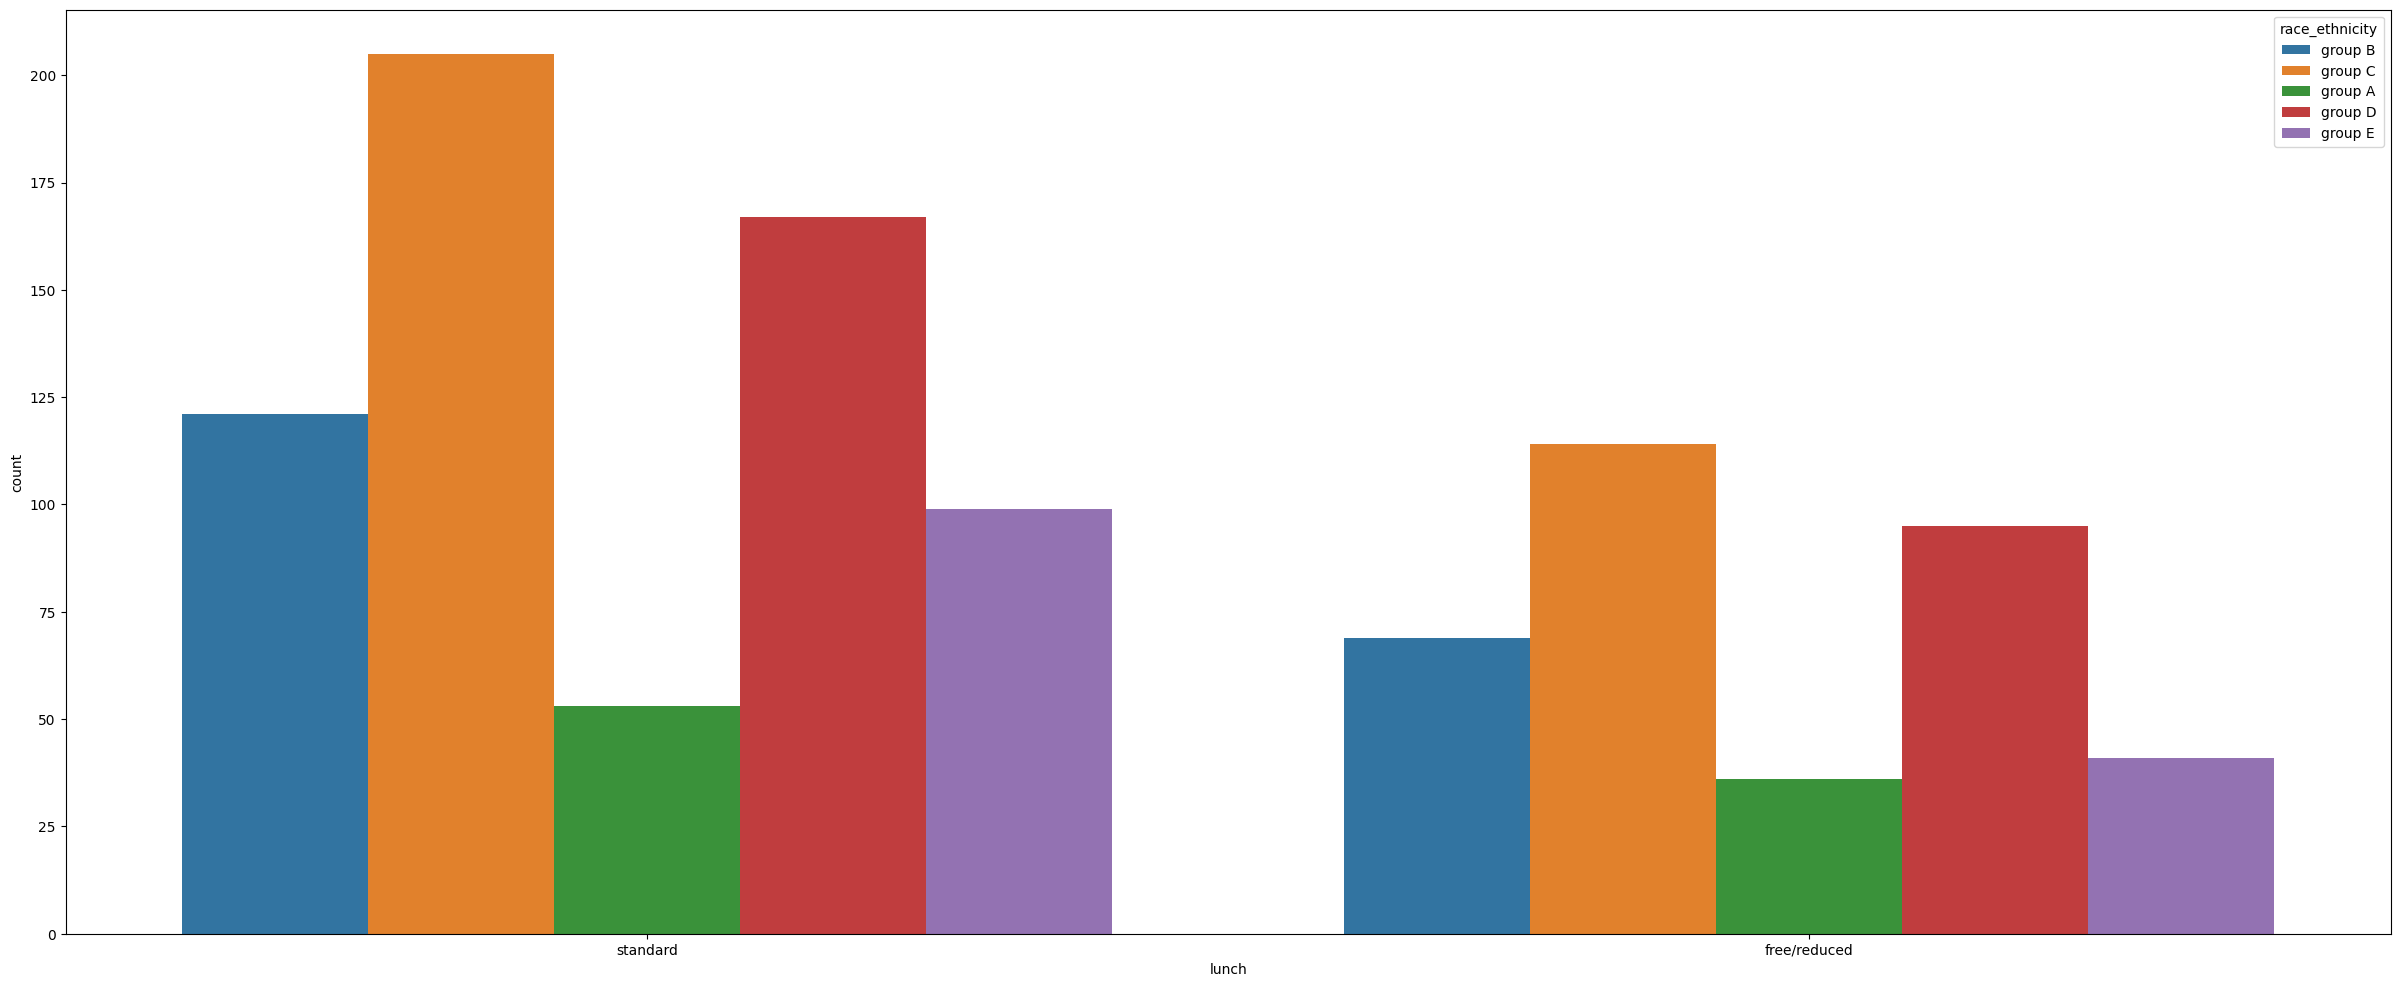

In [265]:
# Lunch Vs Racial_Ethnicity Comparison:

sns.countplot(data = df, x = "lunch", hue = "race_ethnicity")

In [266]:
df.groupby("race_ethnicity")["lunch"].value_counts()

race_ethnicity  lunch       
group A         standard         53
                free/reduced     36
group B         standard        121
                free/reduced     69
group C         standard        205
                free/reduced    114
group D         standard        167
                free/reduced     95
group E         standard         99
                free/reduced     41
Name: count, dtype: int64

In [267]:
# groupby lunch type, and get the value counts (it's faster to use lambdas)

grouped_race_lunch = df.groupby("race_ethnicity")["lunch"].agg(lambda x: x.value_counts()["standard"]/x.value_counts()["free/reduced"])
grouped_race_lunch

race_ethnicity
group A    1.472222
group B    1.753623
group C    1.798246
group D    1.757895
group E    2.414634
Name: lunch, dtype: float64

Text(0, 0.5, 'Standard to reduced lunch ratio')

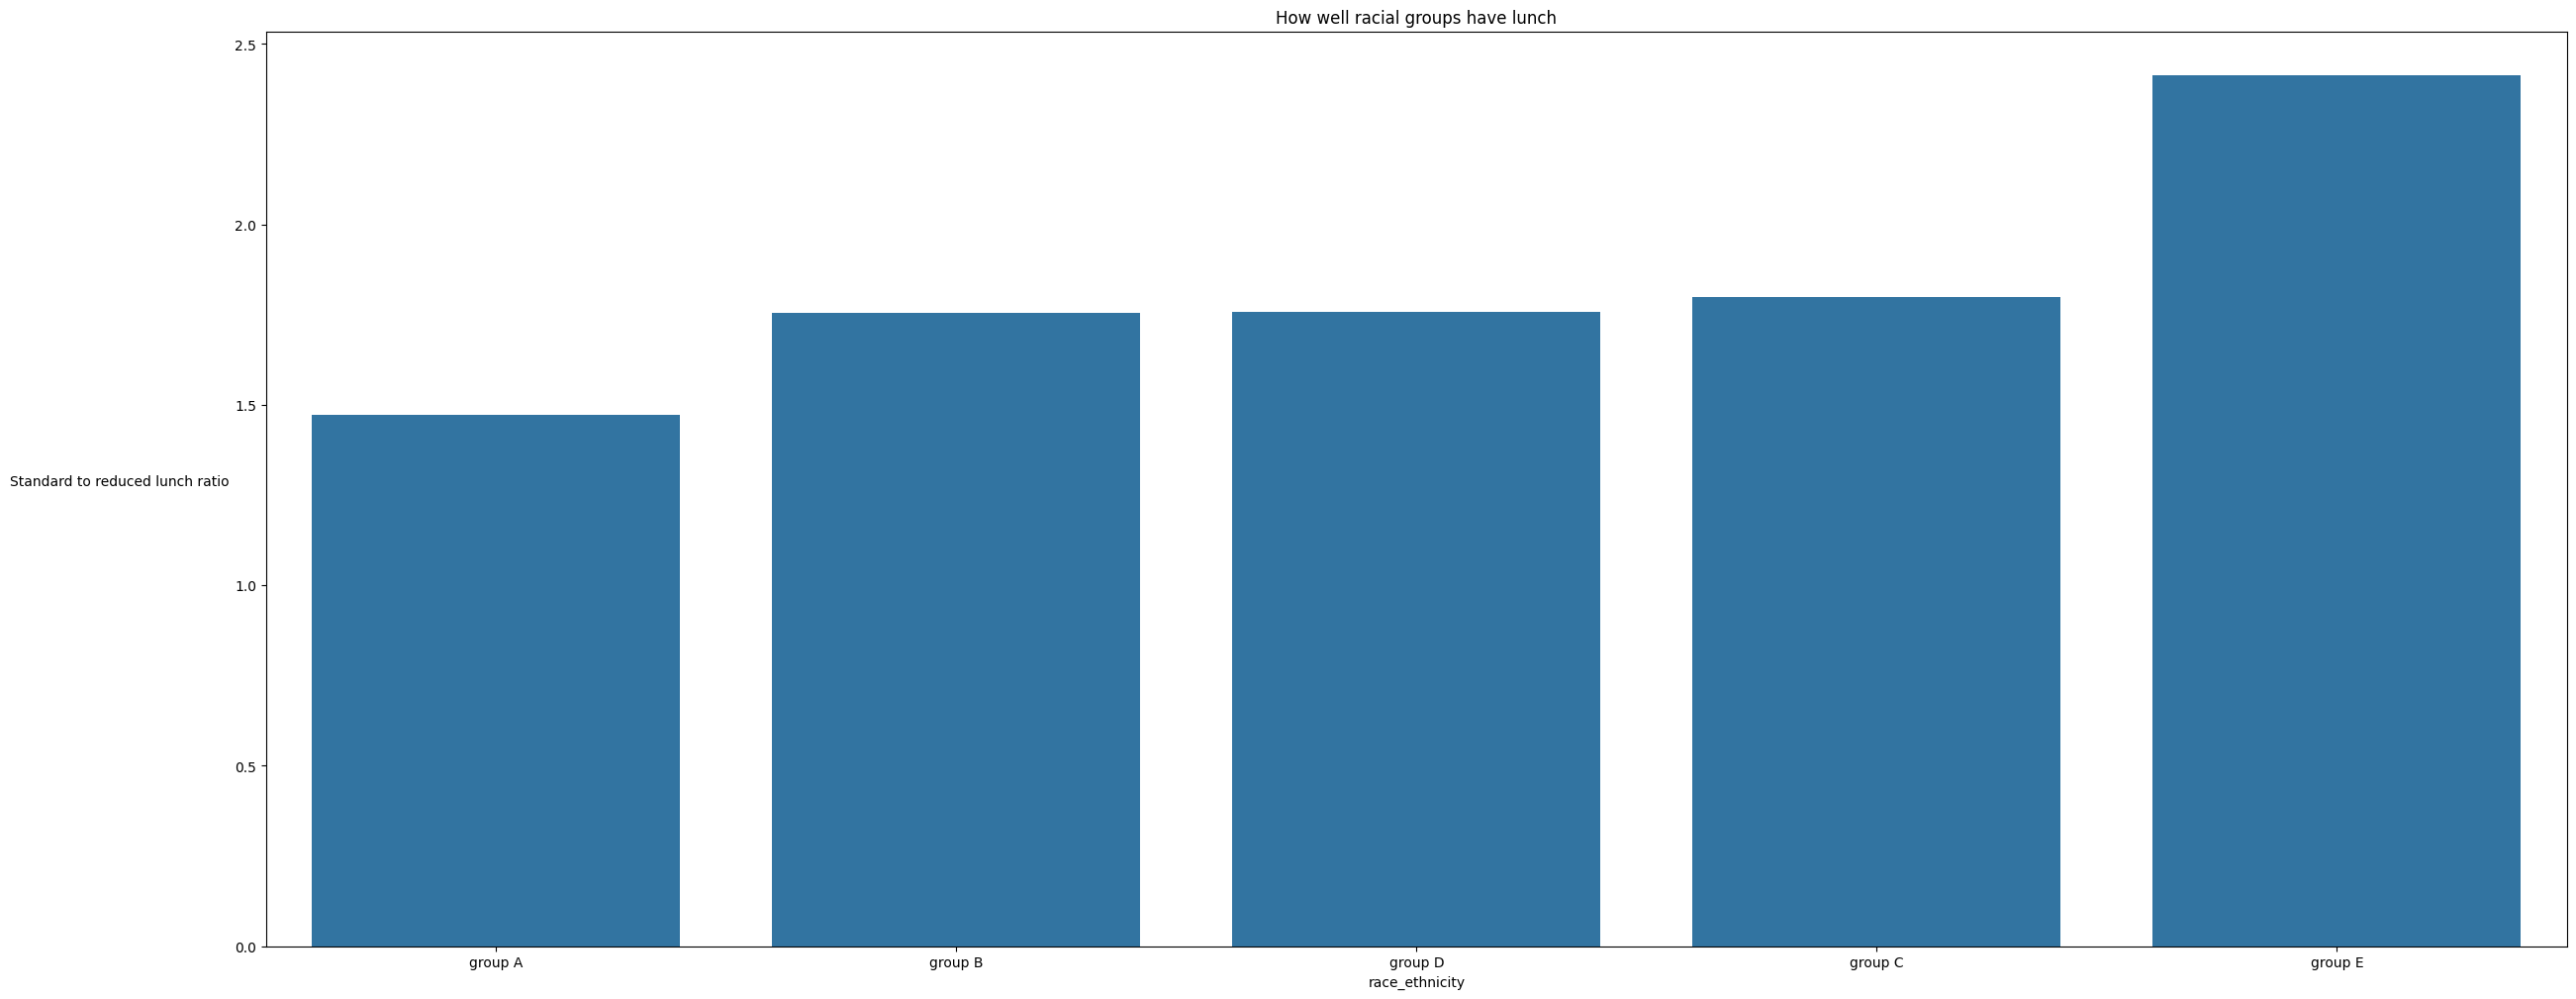

In [268]:
# get the order
ordered = grouped_race_lunch.sort_values()

# plot
sns.barplot(x = ordered.index, y = ordered.values, color = base_color)
plt.title("How well racial groups have lunch")
plt.ylabel("Standard to reduced lunch ratio", ha = "right", rotation = 0)

Insights: 
1. Race has no impact on luch that is taken by the students.
2. Relatively Group E students take more standard lunch and Group A students are worse at it.
3. Above, we found that Group E students outperform in scores. Majority of Group E students afford standard lunch. This implies better financial condition leads to good scores.


**4.5 Multivariate Analysis:**

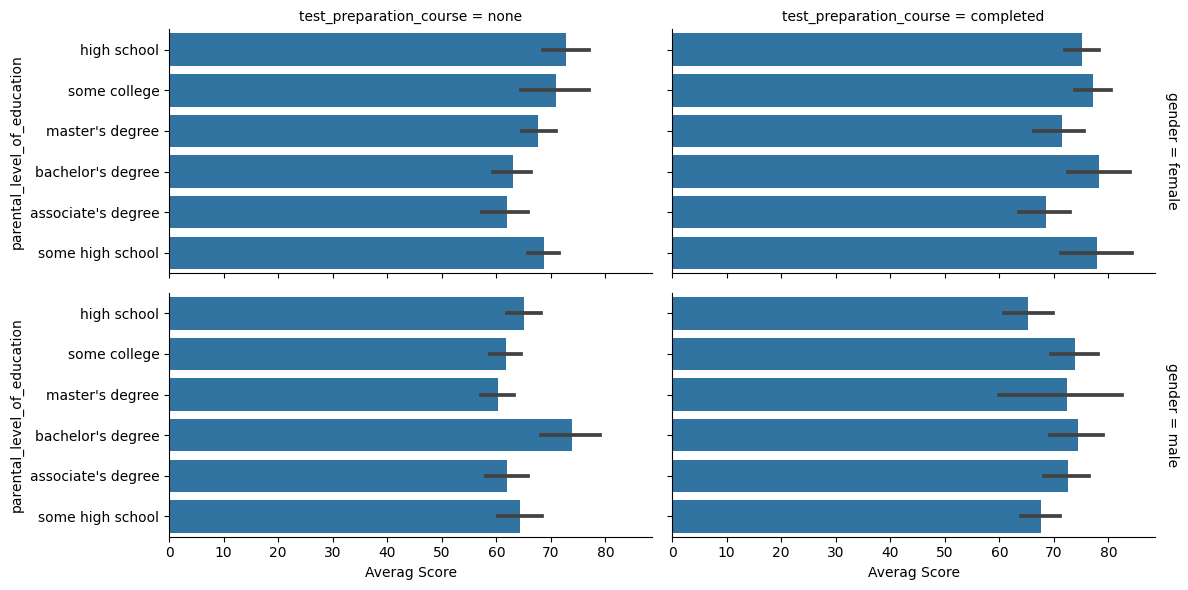

In [271]:
df.head()
g = sns.FacetGrid(data = df, row = "gender", col = "test_preparation_course", height = 3, aspect = 2, margin_titles = True)
g.map(sns.barplot, "avg_score", "parental_level_of_education")
g.set_axis_labels("Averag Score")

Insights:
1. Avg score increases for those who completed test preparation course as compared to those who did not.
2. Females have better score.

**4.6 Outliers**

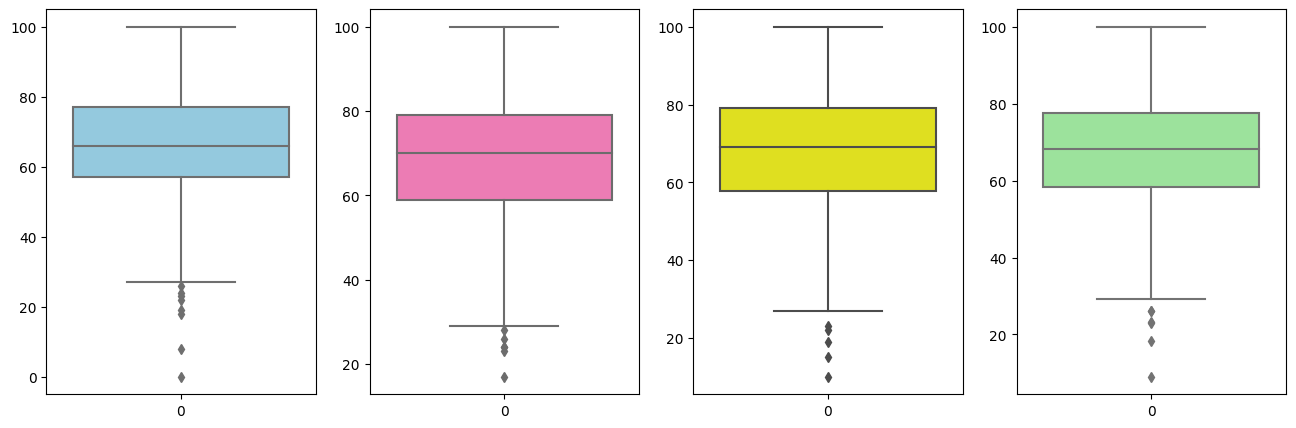

In [273]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['avg_score'],color='lightgreen')
plt.show()

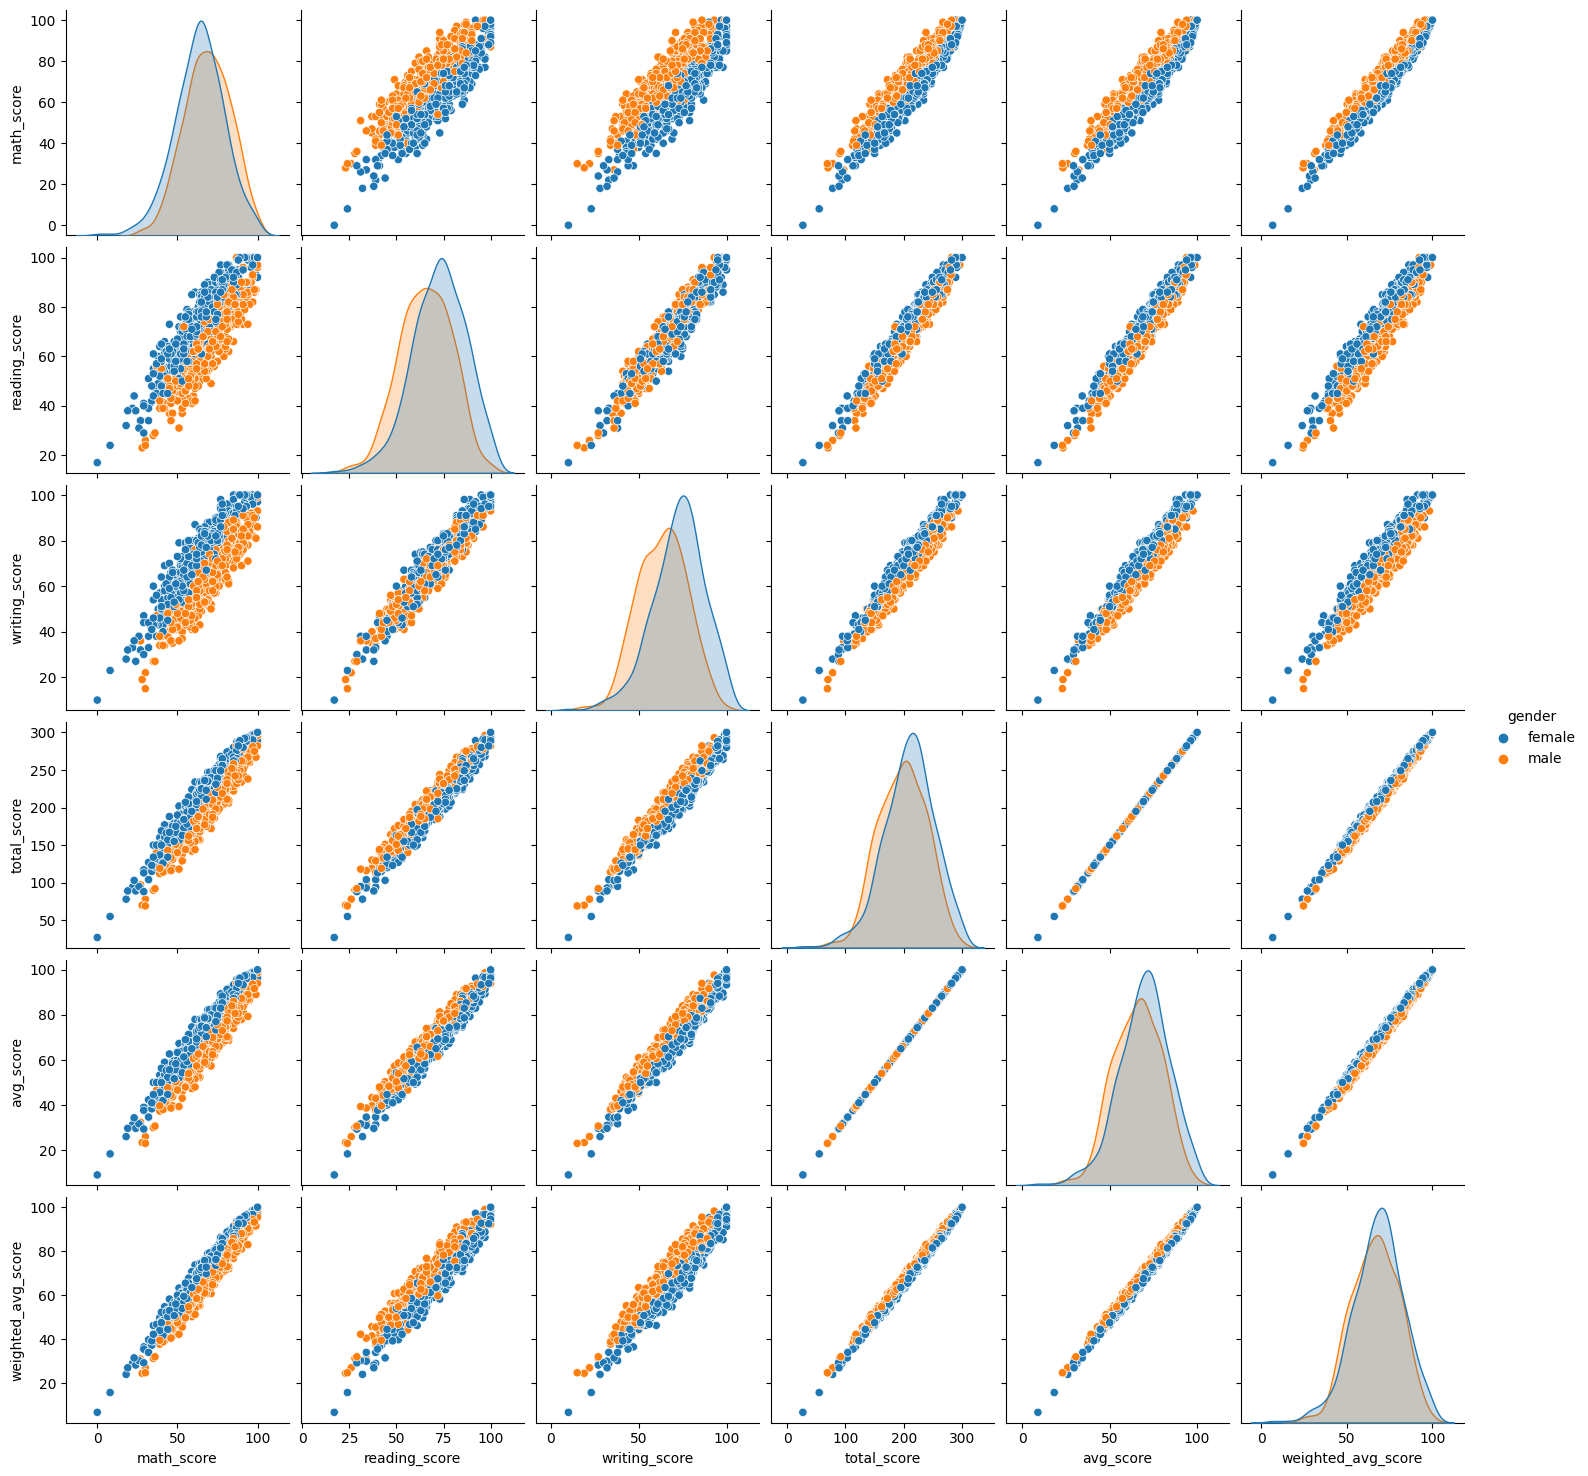

In [274]:
sns.pairplot(df, hue = 'gender')
plt.show()

**5. Conclusions**
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is related to those whoe completed test preparation course
- Parent's educational qualification does not impact on scores.